# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
# Installing the libraries with the specified version.
!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# to set a graph theme in seaborn
sns.set_theme(style="darkgrid",  palette="husl")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

## Import Dataset

In [2]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data
hotel = pd.read_csv('/content/drive/MyDrive/Learning/PGPDSBA/Project-4/INNHotelsGroup.csv')

#Make a copy of the dataset
data = hotel.copy()

## Data Overview

- Observations
- Sanity checks

### Displaying the first few rows of the dataset

In [4]:
data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0            65.00000   
1                                     0           106.68000   
2                                     0            60.00000   
3                                     0           100.00000   
4                                     0            94.50000   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

### Displaying the last few rows of the dataset

In [5]:
data.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270           167.80000                       1   Not_Canceled  
36271            90.95000                       2       Canceled  
36272            98.39000                       2   Not_Canceled  
36273            94.50000                       0       Canceled  
36274           161.67000                       0   Not_Canceled

### Checking the shape of the dataset

In [6]:
data.shape

(36275, 19)

* The dataset contains information (19 attributes) about 36275 Hotel Bookings

### Checking the data types of the columns for the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* There are 14 numeric (*float* and *int* type) and 5 string (*object* type) columns in the data
* The target variable is the booking_status, which is of *Object* type

### Statistical summary of the dataset

In [8]:
data.describe().T

count       mean      std  \
no_of_adults                         36275.00000    1.84496  0.51871   
no_of_children                       36275.00000    0.10528  0.40265   
no_of_weekend_nights                 36275.00000    0.81072  0.87064   
no_of_week_nights                    36275.00000    2.20430  1.41090   
required_car_parking_space           36275.00000    0.03099  0.17328   
lead_time                            36275.00000   85.23256 85.93082   
arrival_year                         36275.00000 2017.82043  0.38384   
arrival_month                        36275.00000    7.42365  3.06989   
arrival_date                         36275.00000   15.59700  8.74045   
repeated_guest                       36275.00000    0.02564  0.15805   
no_of_previous_cancellations         36275.00000    0.02335  0.36833   
no_of_previous_bookings_not_canceled 36275.00000    0.15341  1.75417   
avg_price_per_room                   36275.00000  103.42354 35.08942   
no_of_special_requests               36275.00000    0.61966  0.78624   

                                            min        25%        50%  \
no_of_adults                            0.00000    2.00000    2.00000   
no_of_children                          0.00000    0.00000    0.00000   
no_of_weekend_nights                    0.00000    0.00000    1.00000   
no_of_week_nights                       0.00000    1.00000    2.00000   
required_car_parking_space              0.00000    0.00000    0.00000   
lead_time                               0.00000   17.00000   57.00000   
arrival_year                         2017.00000 2018.00000 2018.00000   
arrival_month                           1.00000    5.00000    8.00000   
arrival_date                            1.00000    8.00000   16.00000   
repeated_guest                          0.00000    0.00000    0.00000   
no_of_previous_cancellations            0.00000    0.00000    0.00000   
no_of_previous_bookings_not_canceled    0.00000    0.00000    0.00000   
avg_price_per_room                      0.00000   80.30000   99.45000   
no_of_special_requests                  0.00000    0.00000    0.00000   

                                            75%        max  
no_of_adults                            2.00000    4.00000  
no_of_children                          0.00000   10.00000  
no_of_weekend_nights                    2.00000    7.00000  
no_of_week_nights                       3.00000   17.00000  
required_car_parking_space              0.00000    1.00000  
lead_time                             126.00000  443.00000  
arrival_year                         2018.00000 2018.00000  
arrival_month                          10.00000   12.00000  
arrival_date                           23.00000   31.00000  
repeated_guest                          0.00000    1.00000  
no_of_previous_cancellations            0.00000   13.00000  
no_of_previous_bookings_not_canceled    0.00000   58.00000  
avg_price_per_room                    120.00000  540.00000  
no_of_special_requests                  1.00000    5.00000

* The no_of_adults for each bookings/single booking are close to 2 and the max being 4.
* The no_of childrens per bookings seem to have some outliers
* There is an average 85 days lead time for the bookings
* The average price of the booking are 103 and with a maximum of 540

### Checking for duplicate values

In [9]:
data.duplicated().sum()

0

* There are no duplicate values in the data

### Checking for missing values

In [10]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

* There are no missing data in any of the columns

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

***The above questions would be answered in the following analysis part.***

### Univariate Analysis

In [11]:
# function to create histogram and boxplot
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [12]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`lead_time`**

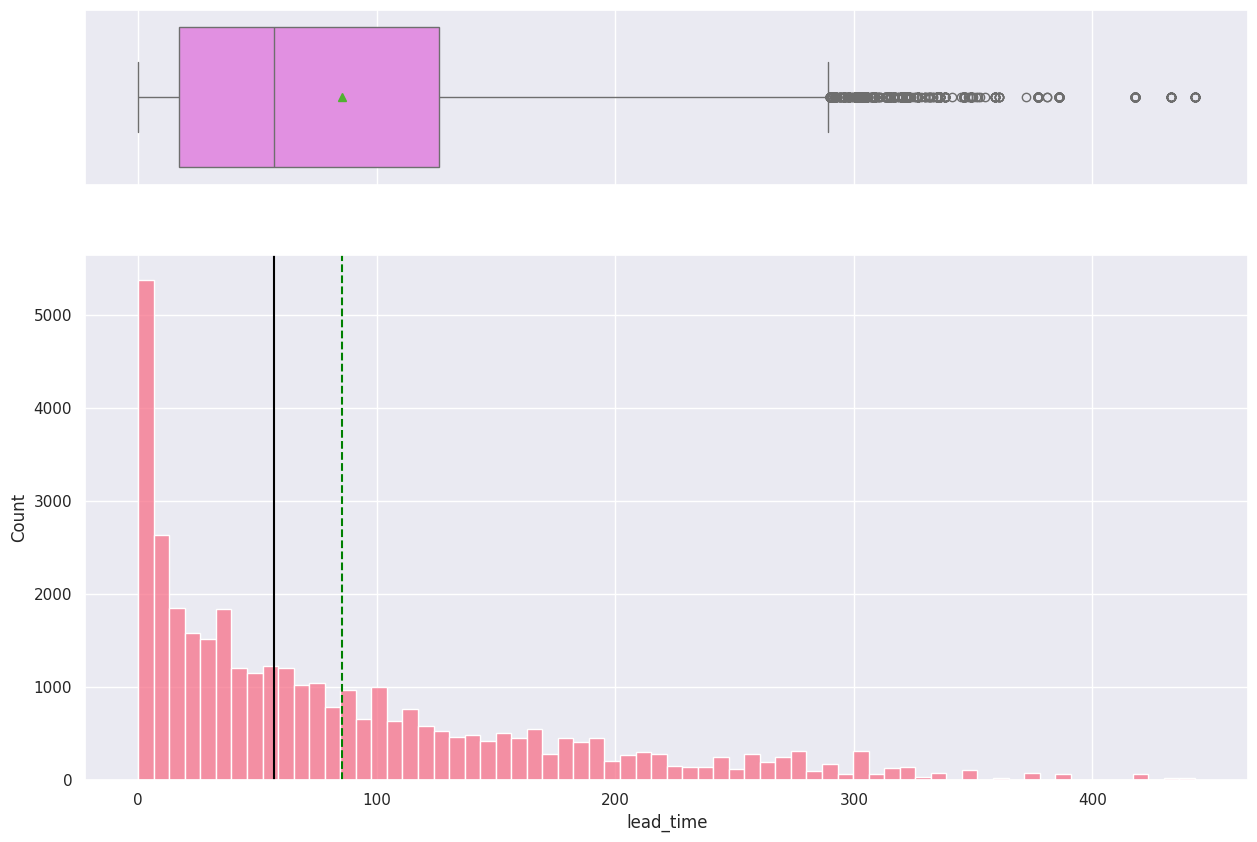

In [13]:
histogram_boxplot(data, "lead_time")

* The distribution is right skewed
* There are so many outliers present for this attribute


**`avg_price_per_room`**

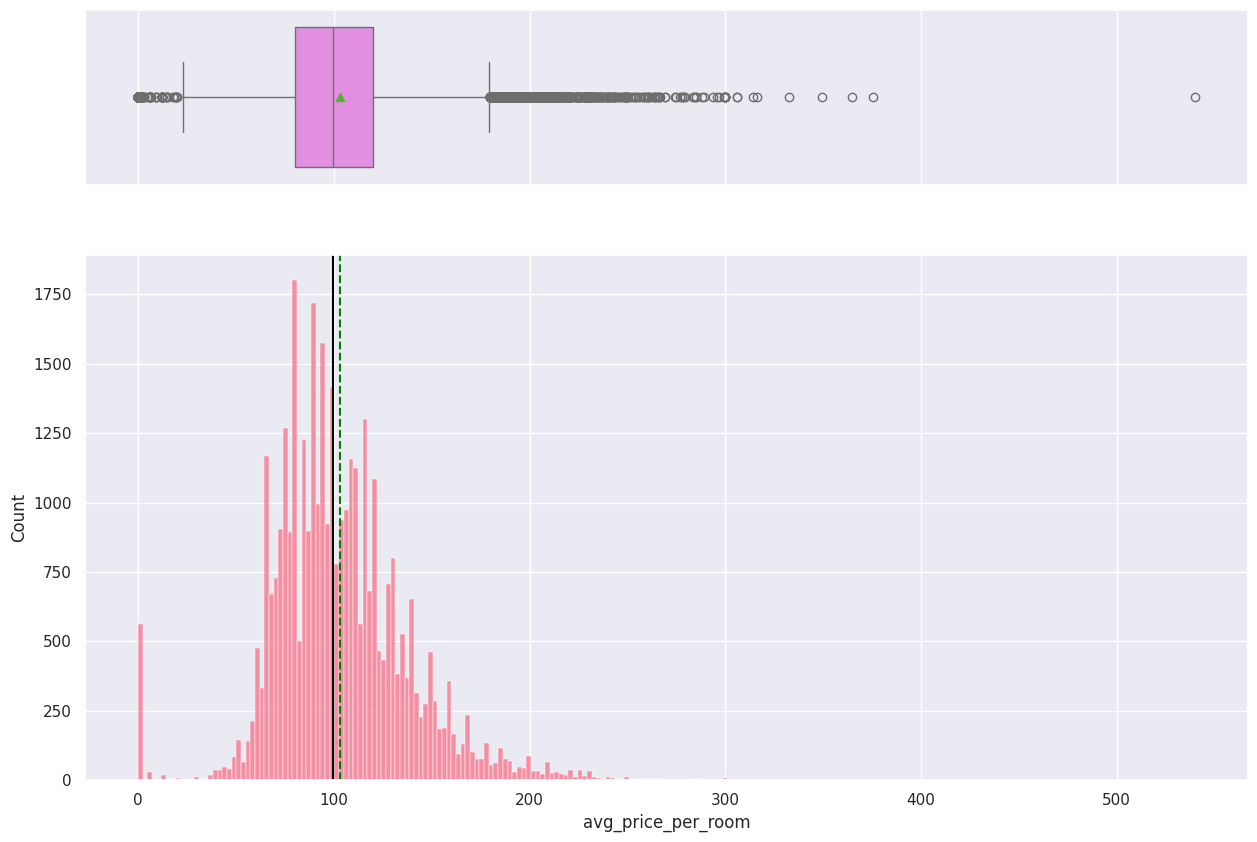

In [14]:
histogram_boxplot(data, "avg_price_per_room")

* The distribution is approximately looks normal
* There are so many outliers present for this attribute

**` no_of_previous_cancellations `**

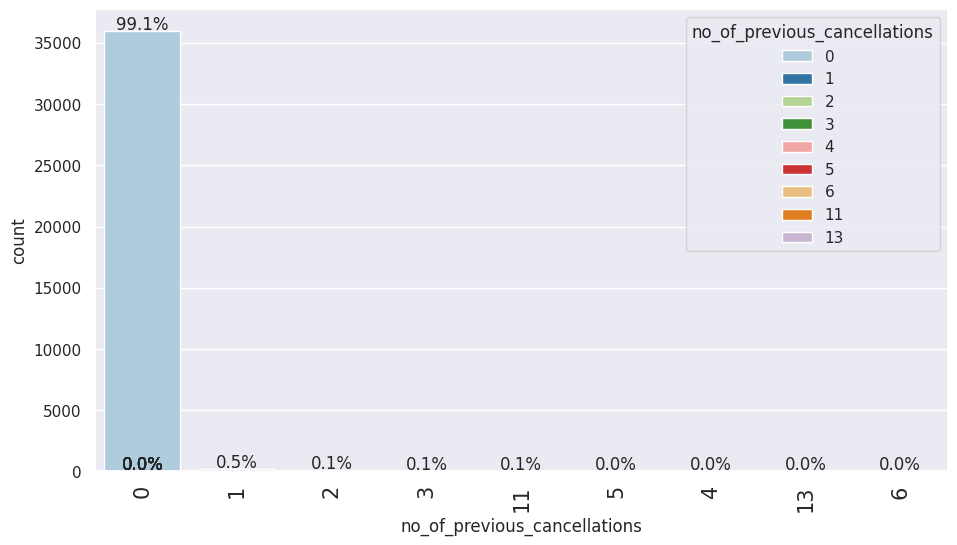

In [15]:
labeled_barplot(data, "no_of_previous_cancellations",True)

* 99% of the bookings did not have any history of that customer cancel a booking before.

**` no_of_previous_bookings_not_canceled `**

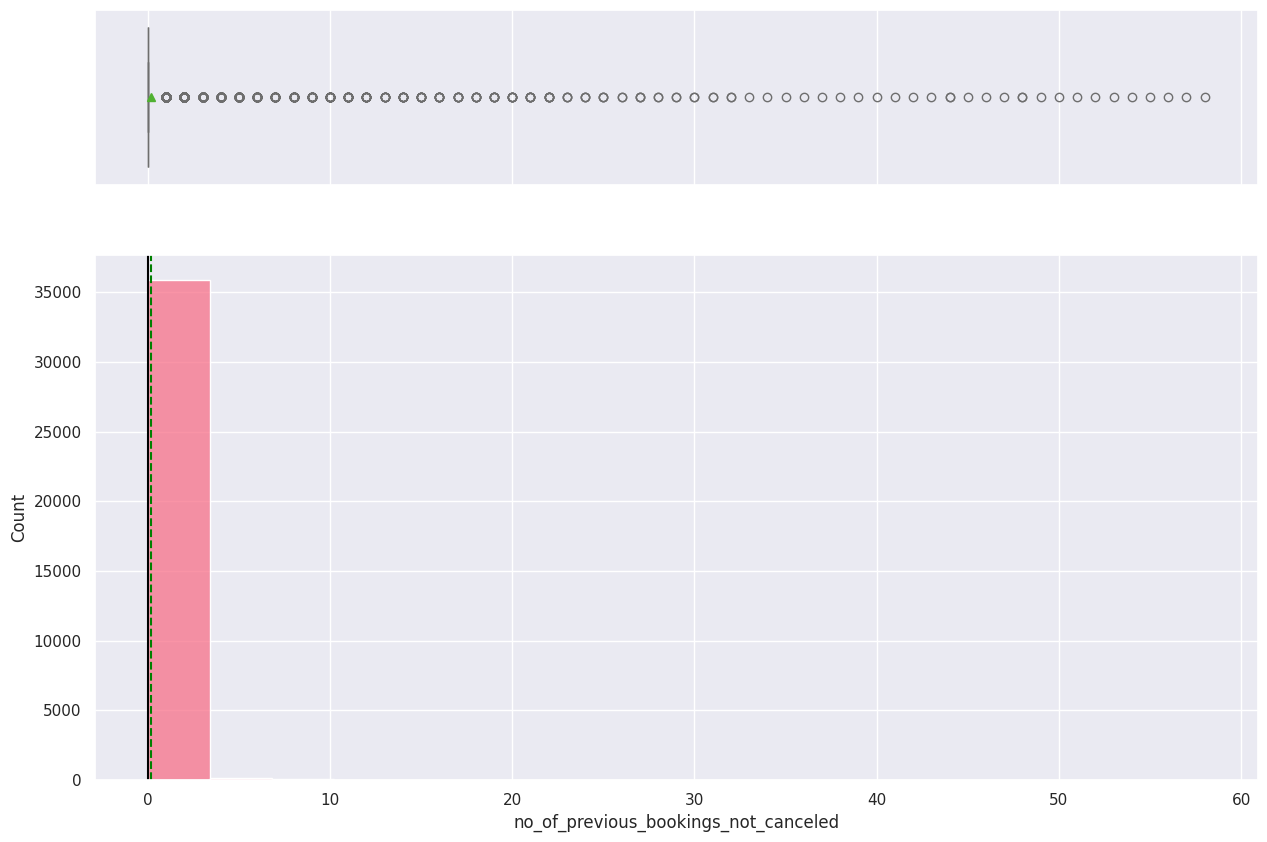

In [16]:
histogram_boxplot(data, "no_of_previous_bookings_not_canceled")

* Most of the values in the "no_of_previous_bookings_not_canceled" are zeroes, which could be because of the first time customers as well

**` no_of_adults `**

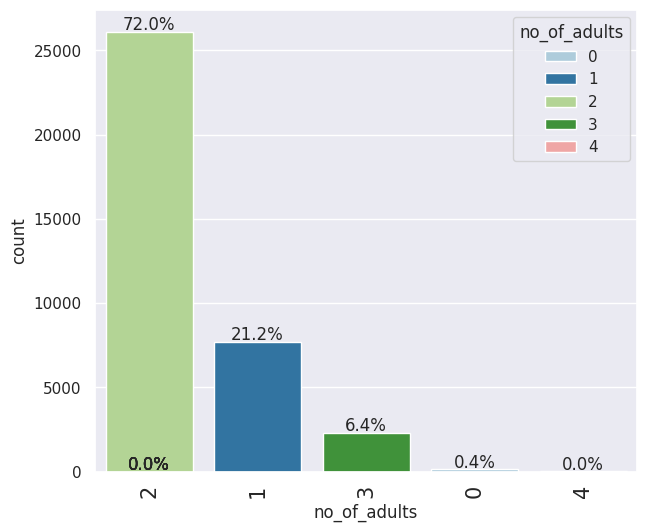

In [17]:
labeled_barplot(data, "no_of_adults",perc=True)

* 72% of the bookings had 2 adults in it and followed by 1 adult and 3 adults

**` no_of_children `**

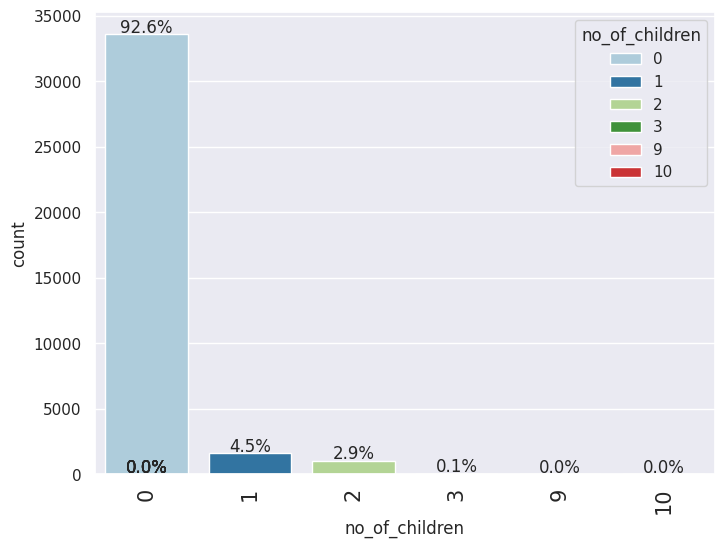

In [18]:
labeled_barplot(data, "no_of_children",perc=True)

* About 93% of the bookings did not have any children in them

**` no_of_week_nights `**

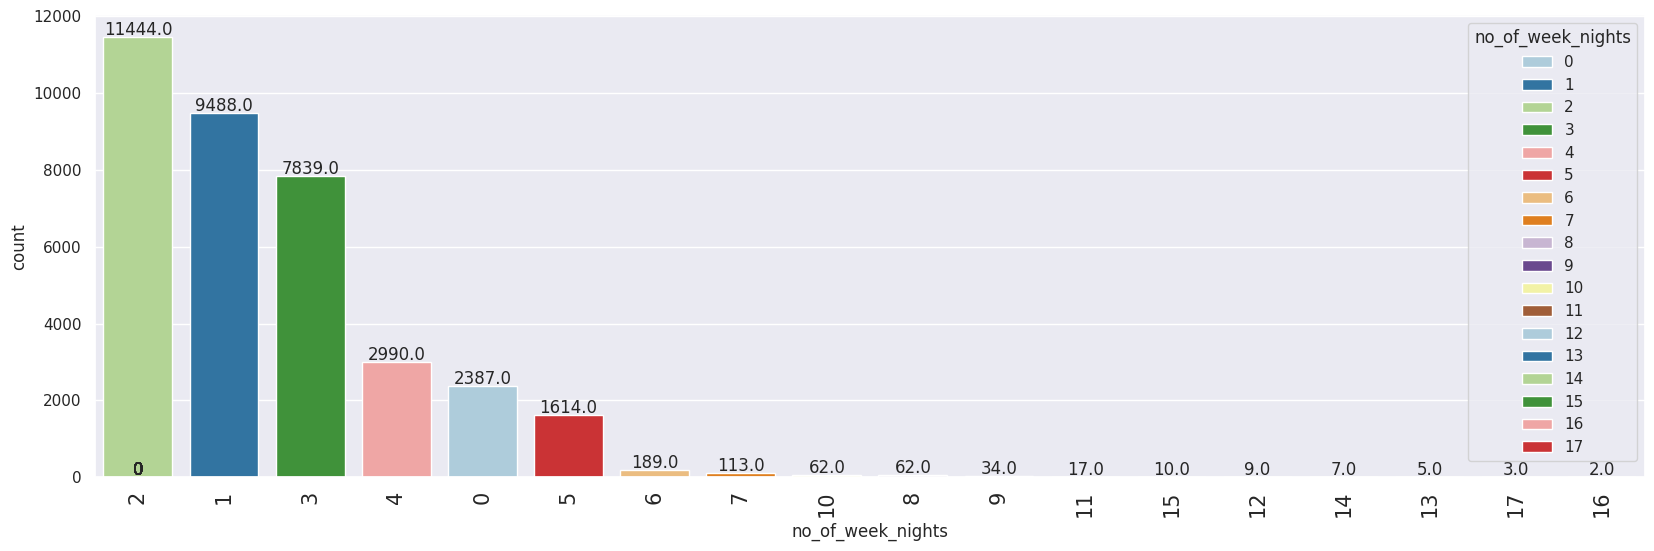

In [19]:
labeled_barplot(data, "no_of_week_nights")

* Most of the booking included 2 week nights followed by 1 and 3 week day nights

**` no_of_weekend_nights `**

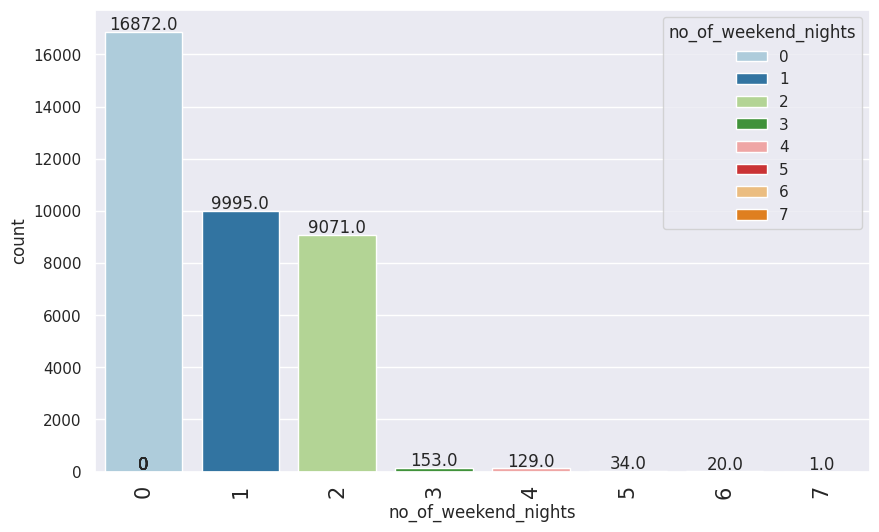

In [20]:
labeled_barplot(data, "no_of_weekend_nights")

* Most of the bookings did not include weekend nights; but also there are significant bookings with 1 and 2 weekend nights as well

**` required_car_parking_space `**

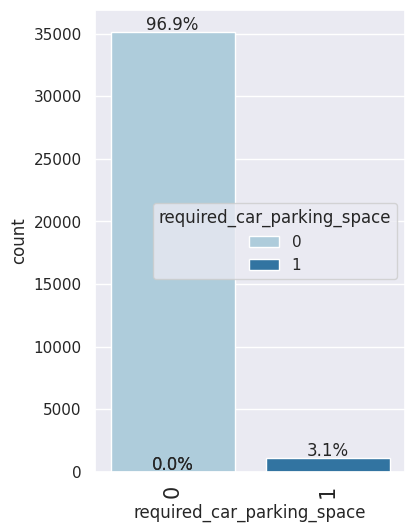

In [21]:
labeled_barplot(data, "required_car_parking_space",perc=True)

* 97% of the bookings did not opt for a cark parking space

**` type_of_meal_plan `**

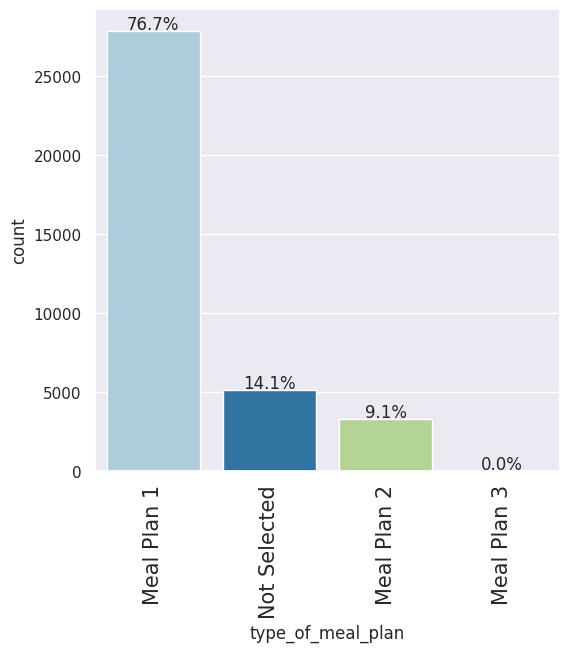

In [22]:
labeled_barplot(data, "type_of_meal_plan",perc=True)

* 77% of the bookings went with choosing Meal Plan-1 and 14% of the bookings did not even opt for any meal plans

**` room_type_reserved `**

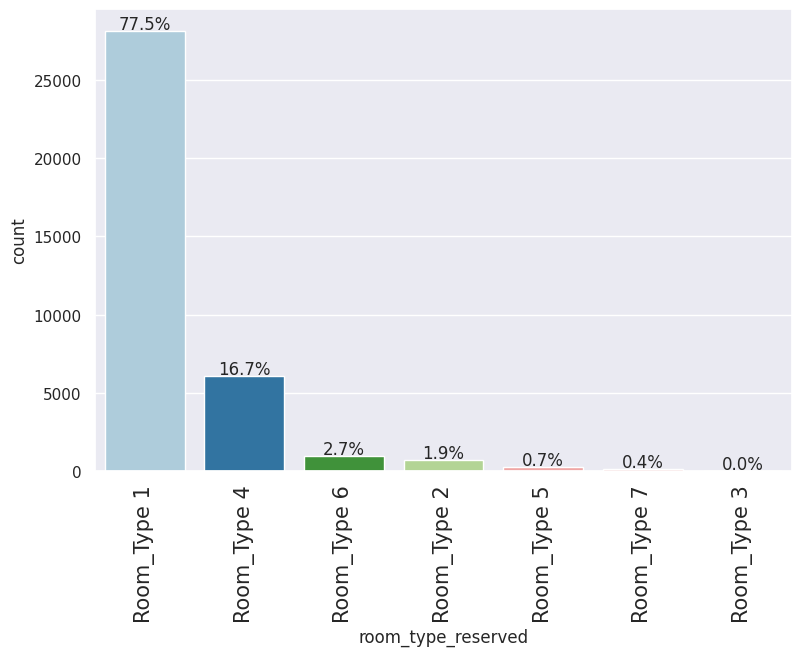

In [23]:
labeled_barplot(data, "room_type_reserved",perc=True)

* Room_Type 1 is the most popular among the bookings followed by Type 4 and 6

**` arrival_month `**

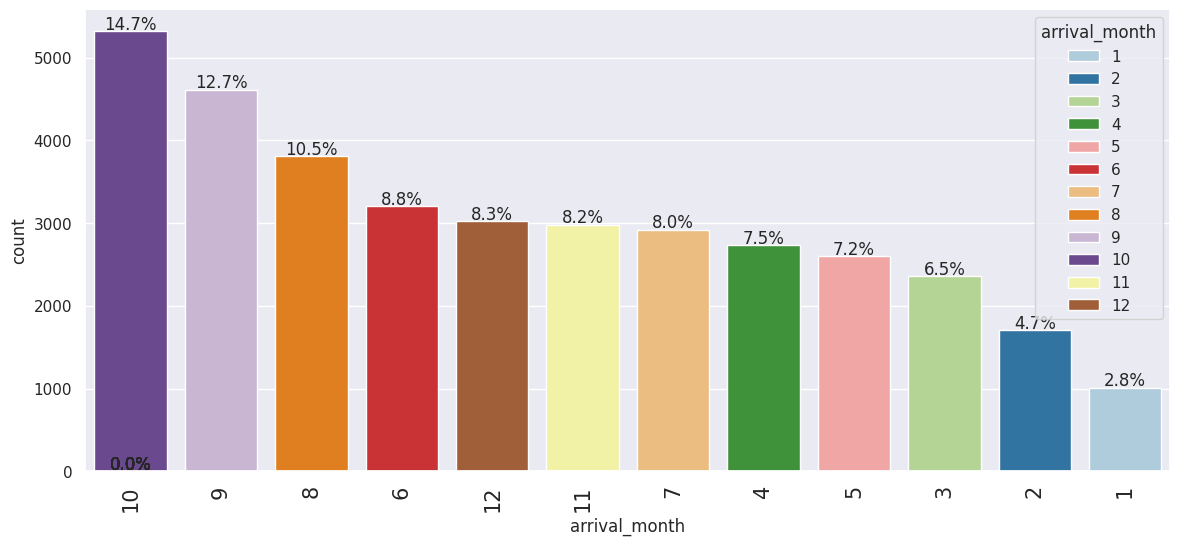

In [24]:
labeled_barplot(data, "arrival_month",perc=True)

* The month of October is showing highest number of bookings followed by Spetember and August. January is the month with least bookings

**` market_segment_type `**

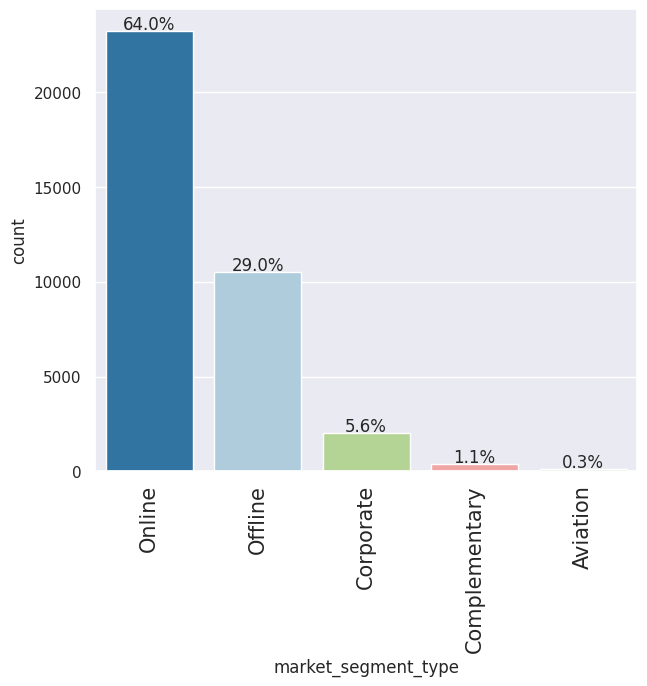

In [25]:
labeled_barplot(data, "market_segment_type",perc=True)

* Online segment contributed to more than half of the bookings followed by offline and corporate

**` no_of_special_requests `**

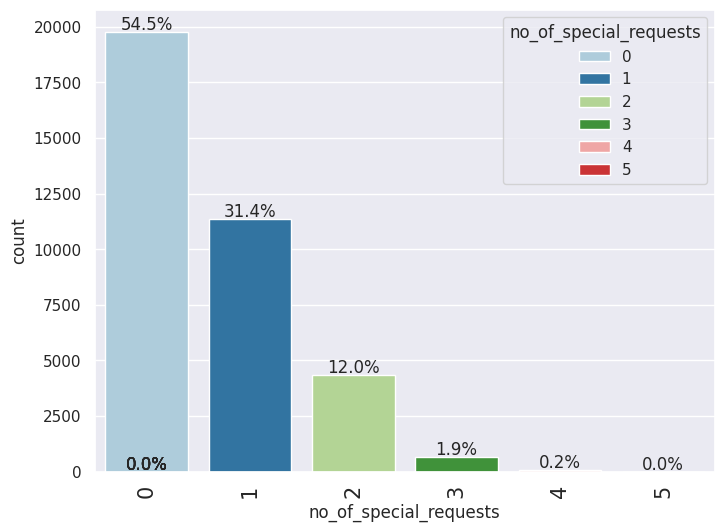

In [26]:
labeled_barplot(data, "no_of_special_requests",perc=True)

* More than half of the bookings did not have any special requests

**` booking_status `**

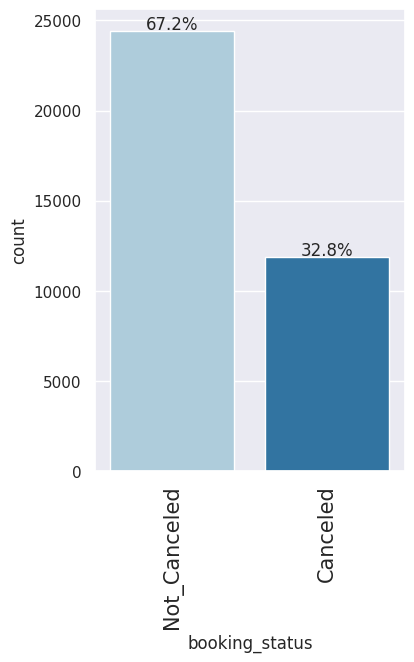

In [27]:
labeled_barplot(data, "booking_status",perc=True)

* Around 33% of the current bookings have got cancelled and that contributes a significant count of cancellations

**Q:What percentage of bookings are canceled?**

* 32.8% of the entire bookings has got cancelled

### Bivariate Analysis

**Correlation Check**

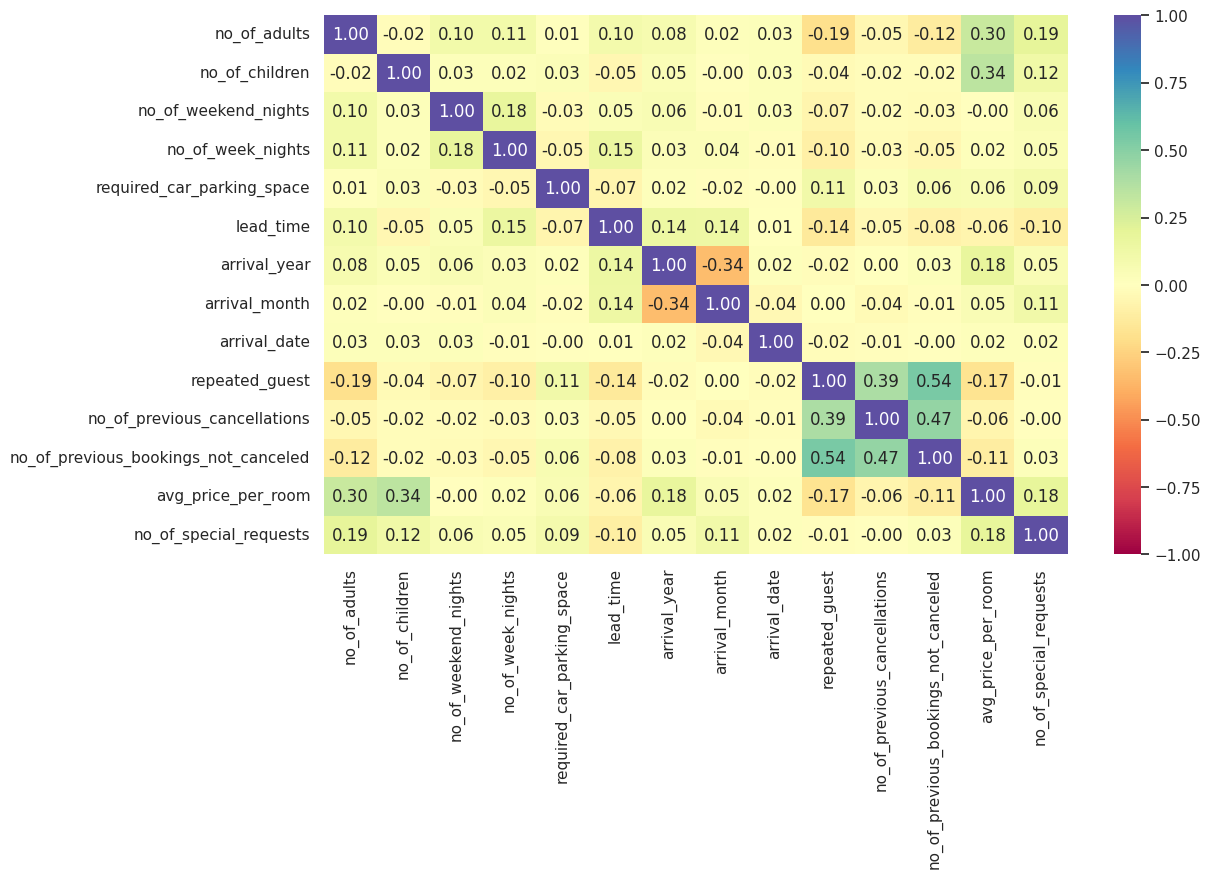

In [28]:
# creating a list of numerical columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
# Remove release year as not relevant for correlation

#plot a heat map
plt.figure(figsize=(12, 7))
sns.heatmap(
    data[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There doesn't seem to be any notable correlation between any attributes
* There is a positive correlation of 0.54 between "repeated_guest" and "no_of _previous_bookings_not_canceled" which could be possible as the repeated guests might have been enjoying their loyalty points


In [29]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0])

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
    )

    plt.tight_layout()
    plt.show()

In [30]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

***No_of_Adults Vs Avg_price_per_room***

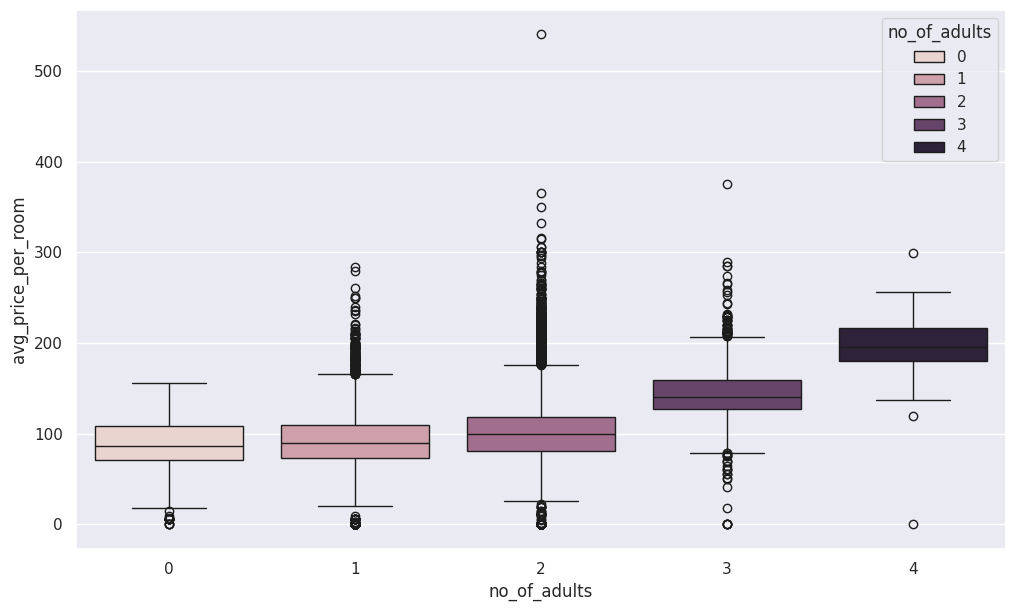

In [31]:
# Plot boxplot for No_of_Adults Vs Avg_price_per_room
plt.figure(figsize=(12, 7))
sns.boxplot(data=data, x="no_of_adults", y="avg_price_per_room",hue="no_of_adults")
plt.show()

* The price of the room tend to increase as the no_of_adults in the booking increases

***Market segment type Vs Average price per room***

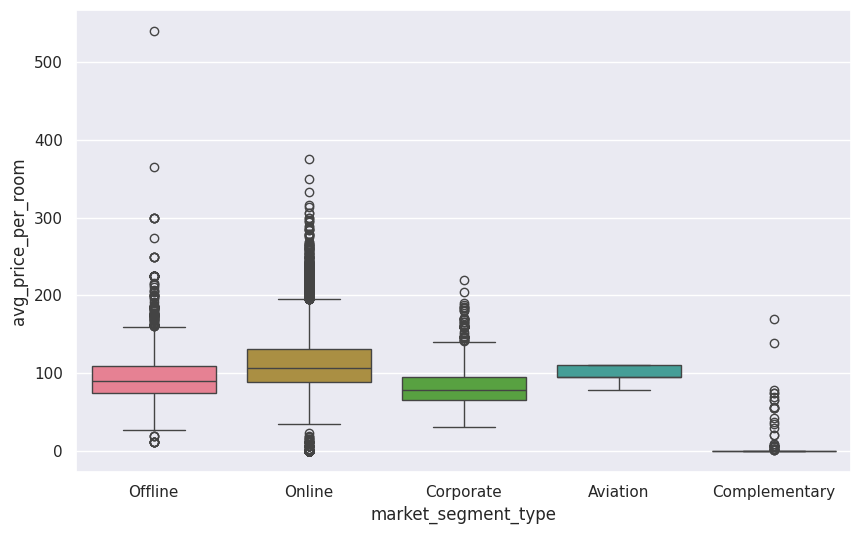

In [32]:
# Plot Boxplot -  Market segment type Vs Average price per room
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room",hue="market_segment_type")
plt.show()

* Online market segment seem to have the highest average prices per room followed by onffline and corporate

**Q:Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?**

* The online market segment appears to have the highest prices, shows that online bookings tend to have higher rates compared to other segments. This could be attributed to various factors such as the convenience of online plattaforms.
* The offline market segment tends to have relatively lower room prices compared to the online segment. This might be because offline bookings may involve direct negotiation with the hotel or traditional travel agencies, which could result in lower negotiated rates or special discounts.

***Market segment type Vs booking_status***

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


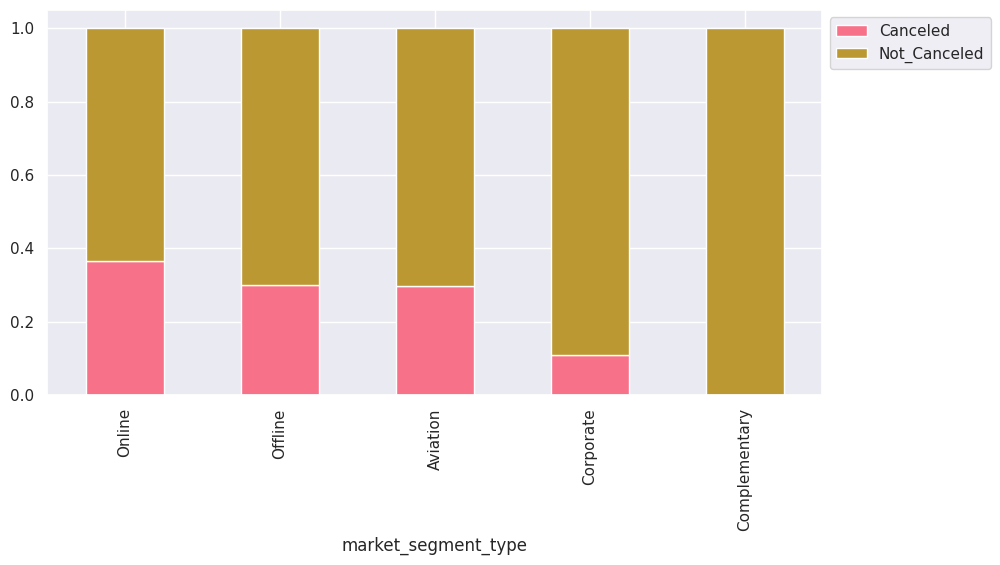

In [33]:
stacked_barplot(data, "market_segment_type", "booking_status")

* Online market segment has highest bookings and cancellations as well followed by offline segment
* Complementary segment has no cancellations so far; but that can't be considered to be promoted as a good business model to reduce cancellations

**Q: Which market segment do most of the guests come from**?

Online market segment comes at the top in terms of number of bookings and guests.

***Special requests Vs Booking status***

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


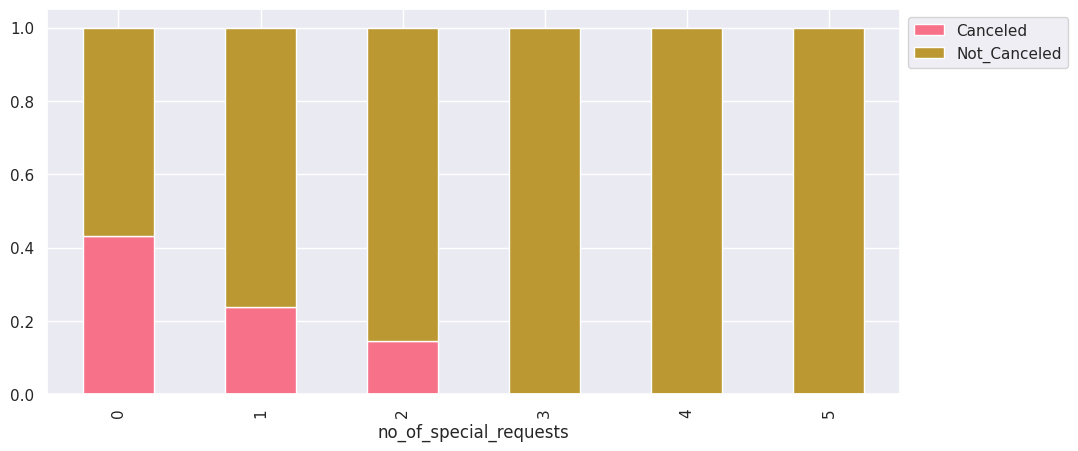

In [34]:
stacked_barplot(data, "no_of_special_requests", "booking_status")

**Q:Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?**

* There is an intereseting trend here that as the number of special reqeusts increases the cancellations tend to decrease or even gets nil. This means customers raising special requests in their bookings are very unlikely to cancel them

***Special requests Vs Average price per room***

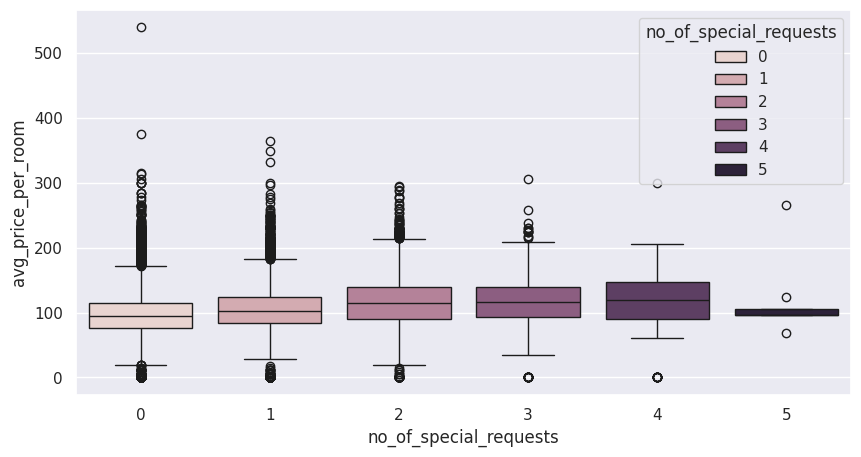

In [35]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = data, x = "no_of_special_requests", y = "avg_price_per_room",hue="no_of_special_requests")
plt.show()

* There seem to be an increase in the average price of the room as the number of sepcial reqeusts increases which is quite obvious in the case of bookings.

***Booking Status Vs Average price per room***

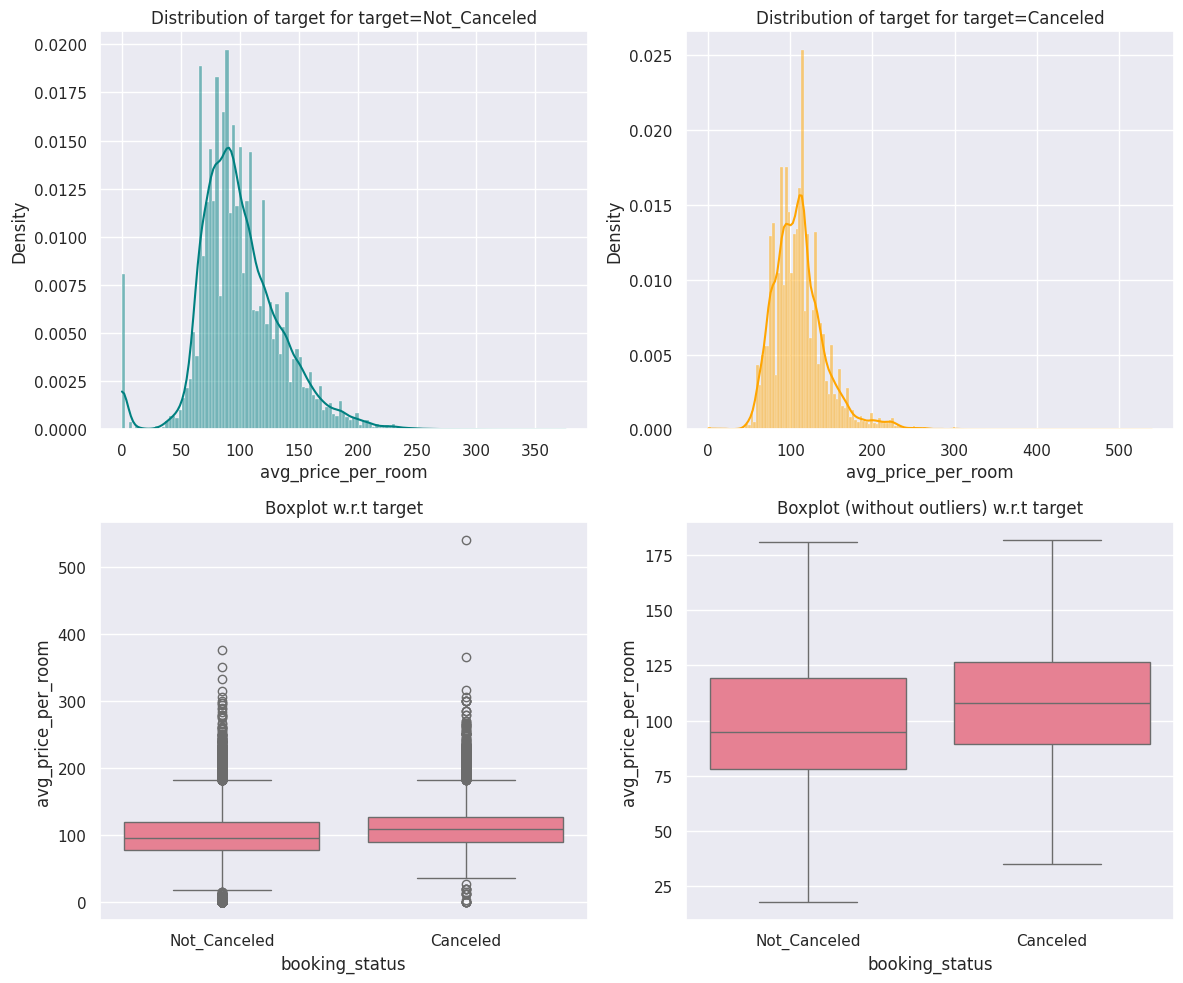

In [36]:
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

* The average room price of the bookings that were canceled are seem to be higher that what the price for the not cancelled bookings

***Booking Status Vs Lead Time***

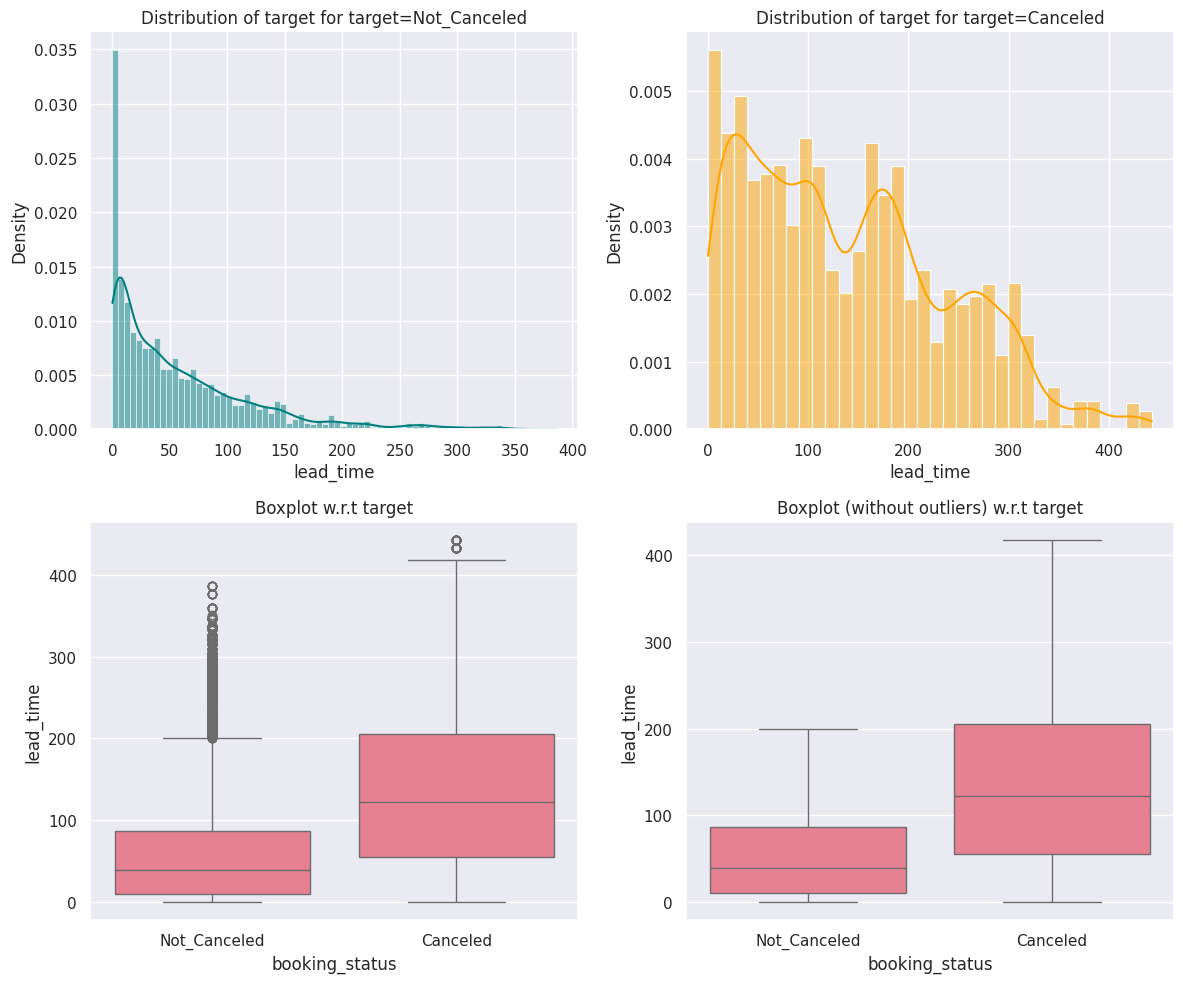

In [37]:
distribution_plot_wrt_target(data, 'lead_time',"booking_status")

* It seems the bookings that gets cancelled has got a higher lead time than the one not cancelled; that is the bookings well in advance are tend to get cancelled mnore

***Bookings with families Vs Booking Status***

In [38]:
family = data[(data["no_of_children"] >=0) & (data["no_of_adults"] >1)]
family.shape

(28441, 19)

In [39]:
family["no_family_members"] = (family["no_of_adults"] + family["no_of_children"])

booking_status     Canceled  Not_Canceled    All
no_family_members                               
All                    9985         18456  28441
2                      8213         15506  23719
3                      1368          2425   3793
4                       398           514    912
5                         5            10     15
11                        1             0      1
12                        0             1      1
------------------------------------------------------------------------------------------------------------------------


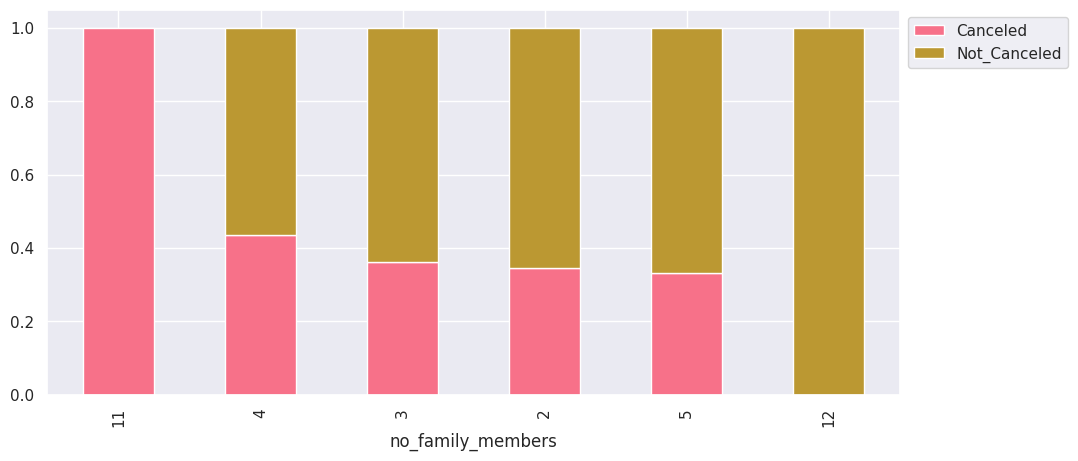

In [40]:
stacked_barplot(family,"no_family_members","booking_status" )

* Ignore Family members with 11 and 12 as outliers, then it seems the no. of family members did not have any impact omn the booking cancellations. There is equally chance of cancellation regardless of how many children they have

***Total days vs Booking status***

In [41]:
stay_data = data[(data["no_of_week_nights"] > 0) & (data["no_of_weekend_nights"] > 0)]
stay_data.shape

(17094, 19)

In [42]:
stay_data["total_days"] = (
    stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"]
)

booking_status  Canceled  Not_Canceled    All
total_days                                   
All                 6115         10979  17094
3                   2183          3689   5872
4                   1387          2977   4364
5                    738          1593   2331
2                    639          1301   1940
6                    465           566   1031
7                    383           590    973
8                     79           100    179
10                    58            51    109
9                     53            58    111
14                    27             5     32
15                    26             5     31
13                    15             3     18
12                    15             9     24
11                    15            24     39
20                     8             3     11
19                     5             1      6
16                     5             1      6
17                     4             1      5
18                     3          

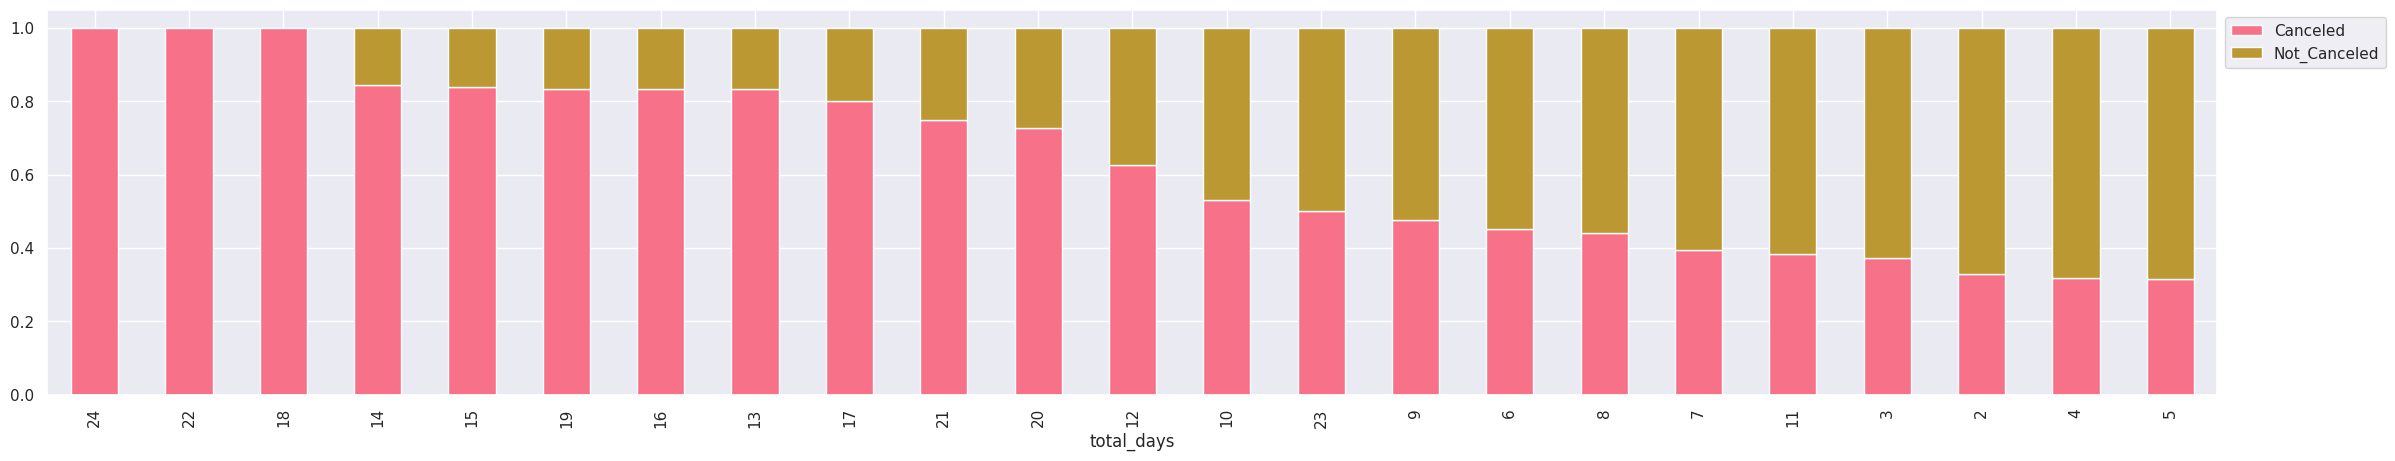

In [43]:
stacked_barplot(stay_data,"total_days","booking_status")

* The majority of booking were for 3 days/nights followed by 4 and 5 nights.
* The majority of cancellations are also following the similar order

**Repeating Guest Vs Booking Status**

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


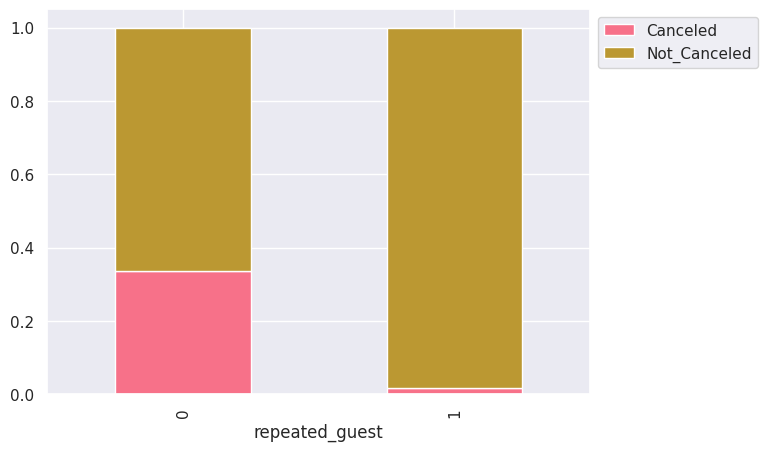

In [44]:
stacked_barplot(data,"repeated_guest","booking_status" )

* Booking cancelations are looking to be lesser with bookings for repeated customers

**Q: Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?**

* Out of these 930 bookings, only 16 reservations have been canceled, which is  1.72%

**Arrival month Vs Guests**

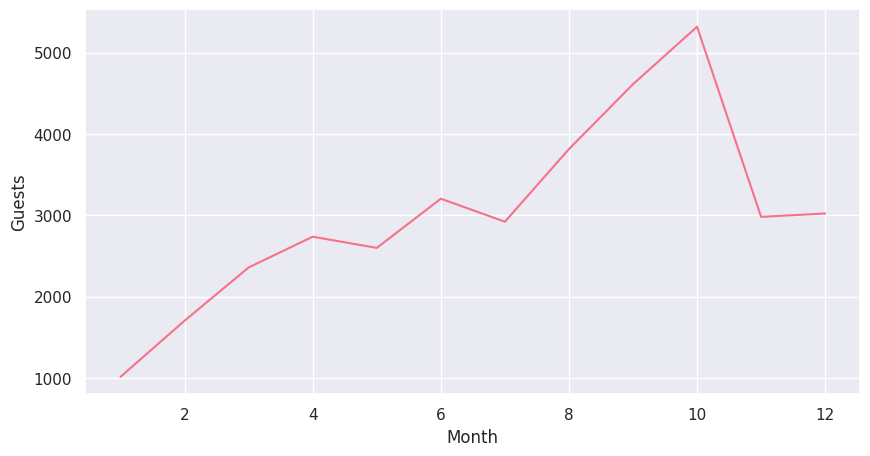

In [46]:
# grouping the data on arrival months and extracting the count of bookings
monthly_data = data.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

**Q. What are the busiest months in the hotel?**

October, September and August are the busiest months in terms of the number of guests/bookings

**Arrival Month Vs Booking Status**

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
10                  1880          3437   5317
9                   1538          3073   4611
8                   1488          2325   3813
7                   1314          1606   2920
6                   1291          1912   3203
4                    995          1741   2736
5                    948          1650   2598
11                   875          2105   2980
3                    700          1658   2358
2                    430          1274   1704
12                   402          2619   3021
1                     24           990   1014
------------------------------------------------------------------------------------------------------------------------


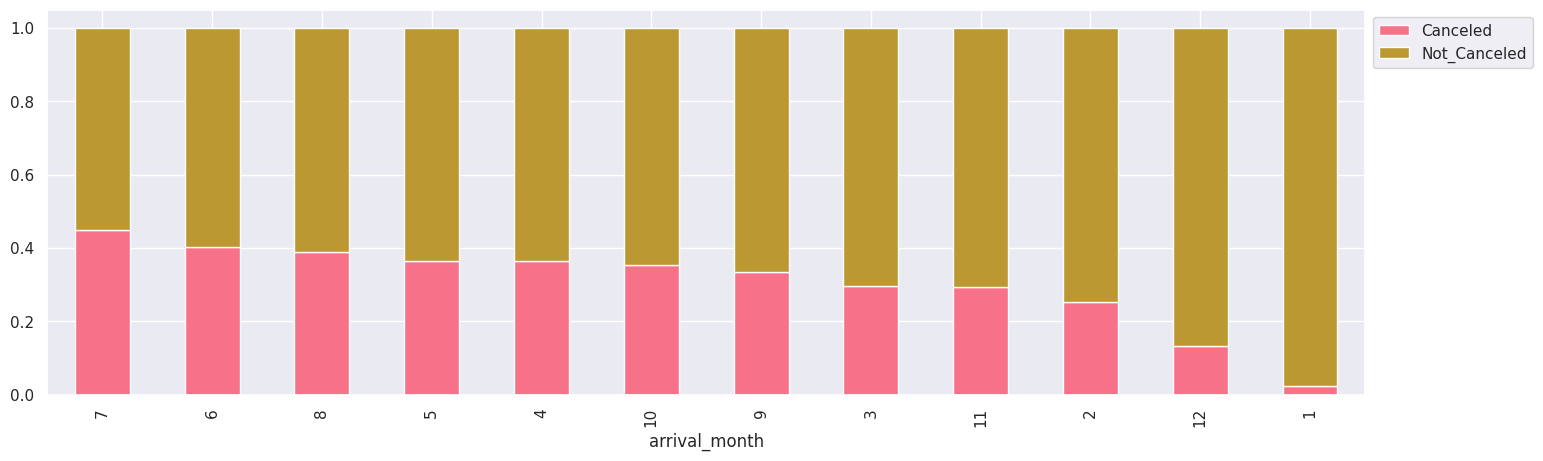

In [47]:
stacked_barplot(data,'arrival_month','booking_status')

* July has the most percentage of cancellations and January has the least.

**Arrival Month Vs Avg price of room**

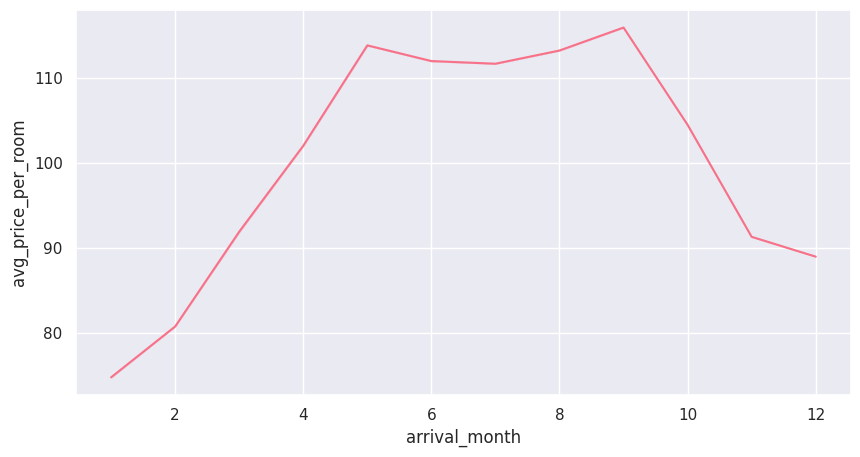

In [48]:
plt.figure(figsize=(10,5))
sns.lineplot(data=data,x='arrival_month',y='avg_price_per_room',ci=False)
plt.show()

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

**Check for missing values**

In [49]:
data.isnull().sum() #Checking again the columns with missing values

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

* There are no missing values and hence nothing needed to be done in terms of missing value treatment

**Feature Engineering**

***Let's drop the Booking_ID column first before we proceed forward.***

In [50]:
data=data.drop(["Booking_ID"], axis=1)

***Let's encode Canceled bookings to 1 and Not_Canceled as 0 for further process***

In [51]:
data["booking_status"] = data["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

**Outlier detection and treatment**

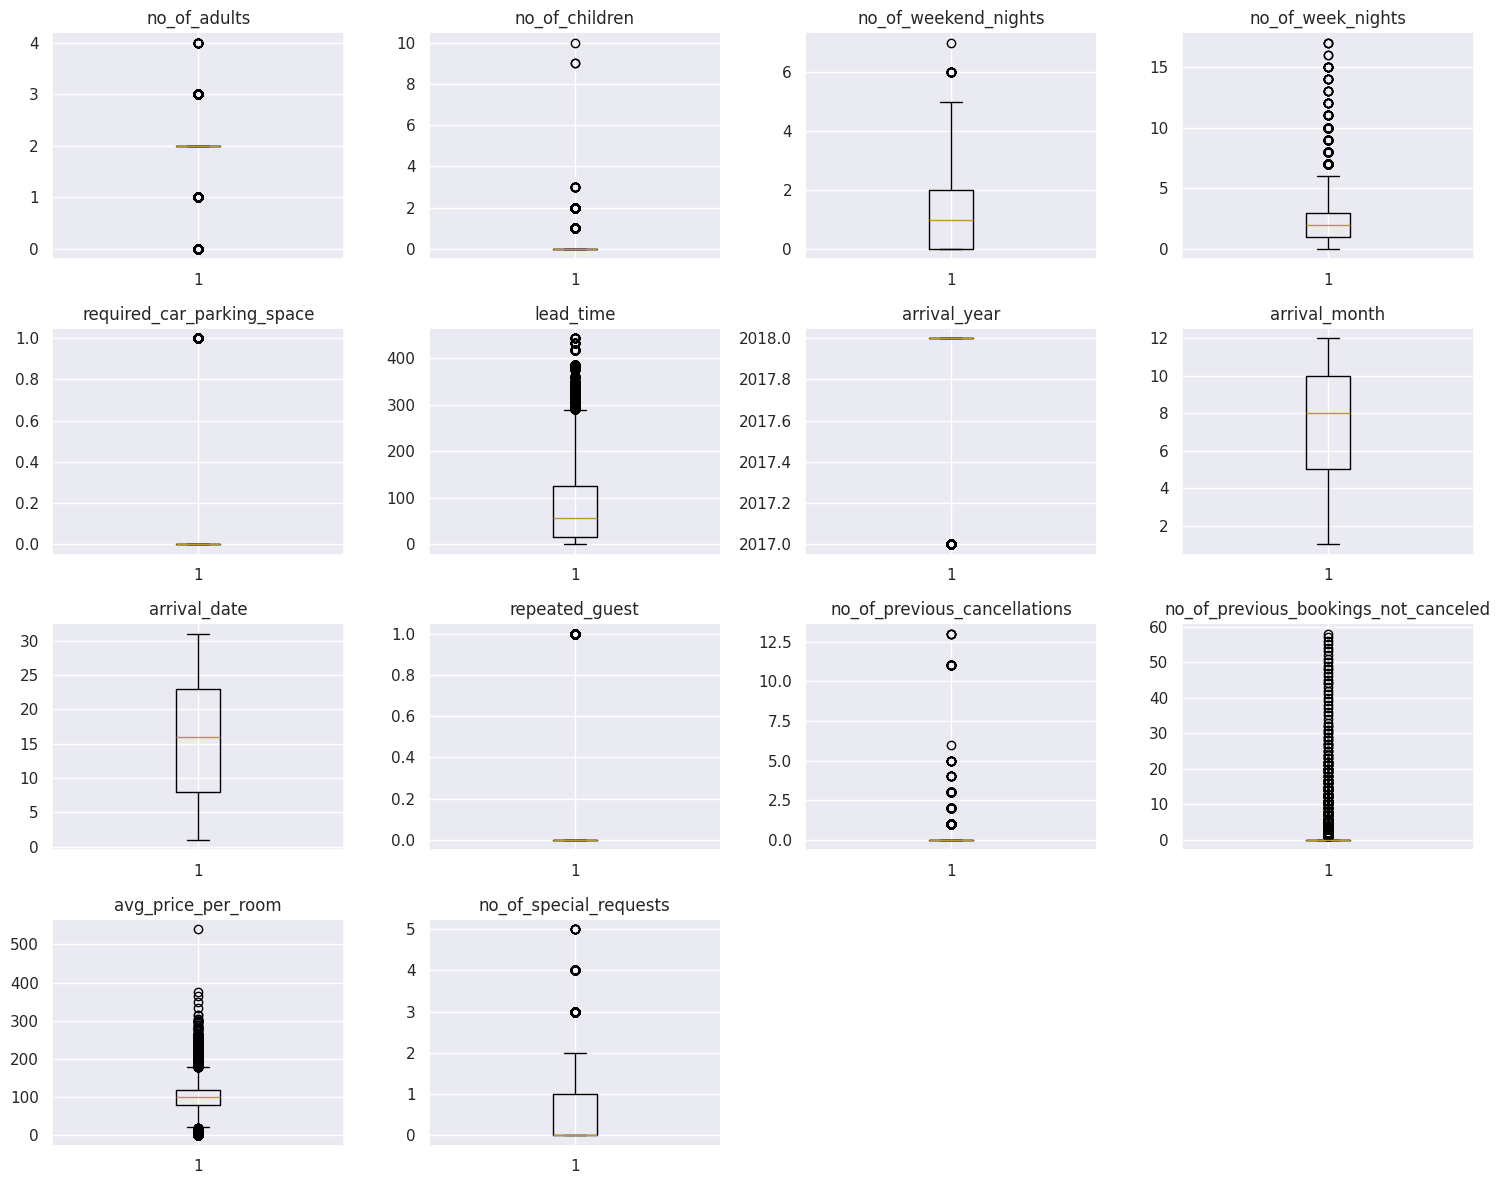

In [52]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping booking_status
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* All of these are part of the data and hence not treating trhem for outliers.
* However just applying an outlier treatment for the average_price_per_room column

In [53]:
#Calculating the 25th quartile of the average room price
Q1 = data['avg_price_per_room'].quantile(0.25)

#Calculating the 75th quartile of the average room price
Q3 = data['avg_price_per_room'].quantile(0.75)

#IQR
IQR = Q3 - Q1

#Calculating the upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [54]:
#Assigning the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

## EDA

- It is a good idea to explore the data once again after manipulating it.
- However, since nothing has been changed since the initial EDA, there is no point oin redoing them; so lets proceed to the next steps

## Building a Logistic Regression model

### Data Preparation for Modeling

In [55]:
#Make a copy of the dataset
df = data.copy()

In [56]:
# specifying the independent  and dependent variables
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

In [57]:
X = sm.add_constant(X) # adding a constant to the independent variables

In [58]:
X = pd.get_dummies(X,columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,dtype=int) # creating dummy variables

In [59]:
X.shape

(36275, 28)

In [60]:
# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [61]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
booking_status
0   0.67064
1   0.32936
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.67638
1   0.32362
Name: proportion, dtype: float64


## Model Building - Logistic Regression

- We will now perform logistic regression using statsmodels, a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration.

- Using statsmodels, we will be able to check the statistical validity of our model - identify the significant predictors from p-values that we get for each predictor variable.

In [62]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Wed, 12 Feb 2025   Pseudo R-squ.:                  0.3292
Time:                        17:47:12   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -924.1330    120.816     -7.649      0.000   -1160.928    -687.338
no_of_adults                             0.1136      

**Observations**

- Negative values of the coefficient show that the probability of a booking cancelation decreases with the increase of the corresponding attribute value.

- Positive values of the coefficient show that the probability of a booking cancelation increases with the increase of the corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

## Model performance evaluation

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking.

### Which case is more important?
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity.



### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models.
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [63]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [64]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

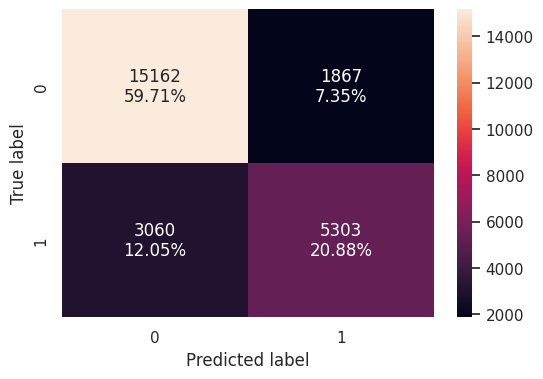

In [65]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [66]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy  Recall  Precision      F1
0   0.80596 0.63410    0.73961 0.68280

**Observations**

- The f1_score of the model is ~0.68 and we will try to maximize it further

- The variables used to build the model might contain multicollinearity, which will affect the p-values

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values

### Detecting and Dealing with Multicollinearity

There are different ways of detecting (or testing for) multicollinearity. One such way is using the Variation Inflation Factor (VIF).

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient $\beta_k$ is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model.

* **General Rule of thumb**:
  - If VIF is 1 then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence  the variance of $\beta_k$ is not inflated at all
  - If VIF exceeds 5, we say there is moderate multicollinearity
  - If VIF is equal or exceeding 10, it shows signs of high multi-collinearity

* The purpose of the analysis should dictate which threshold to use

In [67]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [68]:
checking_vif(X_train)

feature            VIF
0                                  const 39491186.47744
1                           no_of_adults        1.34849
2                         no_of_children        1.97862
3                   no_of_weekend_nights        1.06949
4                      no_of_week_nights        1.09567
5             required_car_parking_space        1.03998
6                              lead_time        1.39518
7                           arrival_year        1.43167
8                          arrival_month        1.27637
9                           arrival_date        1.00674
10                        repeated_guest        1.78361
11          no_of_previous_cancellations        1.39569
12  no_of_previous_bookings_not_canceled        1.65200
13                    avg_price_per_room        2.06421
14                no_of_special_requests        1.24730
15         type_of_meal_plan_Meal Plan 2        1.27325
16         type_of_meal_plan_Meal Plan 3        1.02522
17        type_of_meal_plan_Not Selected        1.27252
18        room_type_reserved_Room_Type 2        1.10151
19        room_type_reserved_Room_Type 3        1.00330
20        room_type_reserved_Room_Type 4        1.36261
21        room_type_reserved_Room_Type 5        1.02797
22        room_type_reserved_Room_Type 6        1.97490
23        room_type_reserved_Room_Type 7        1.11559
24     market_segment_type_Complementary        4.50229
25         market_segment_type_Corporate       16.92846
26           market_segment_type_Offline       64.11425
27            market_segment_type_Online       71.17686

* Only 3 dummy variables columns found to have a VIF greater than 5.
* Since these are categorical dummy variable lets not touch tghem for multi collinearity and proceed to next step

### Removing high p-value variables

* For other attributes present in the data, the p-values are high only for few dummy variables and since only one (or some) of the categorical levels have a high p-value we will drop them iteratively as sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.

* Instead, we will do the following repeatedly using a loop:
  - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
  - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
  - Repeat the above two steps till there are no columns with p-value > 0.05.


Note: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [69]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [70]:
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [71]:
# Fit the lg1 model
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit()

print(lg1.summary())

Optimization terminated successfully.
         Current function value: 0.425716
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Wed, 12 Feb 2025   Pseudo R-squ.:                  0.3282
Time:                        17:48:16   Log-Likelihood:                -10810.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -916.8647    120.456     -7.612    

In [72]:
print("Training performance before :")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance before :


Accuracy  Recall  Precision      F1
0   0.80596 0.63410    0.73961 0.68280

In [73]:
print('Training Performance after Multi.Collinearity and P-value checks:')
model_performance_classification_statsmodels(lg1,X_train1,y_train)

Training Performance after Multi.Collinearity and P-value checks:


Accuracy  Recall  Precision      F1
0   0.80537 0.63243    0.73900 0.68157

* We can see after dropping p-values there is no significant change in the model performance as compared to initial model.

####  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [74]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds           0.00000       1.11487         1.16411               1.11466   
Change_odd% -100.00000      11.48701        16.41072              11.46616   

             no_of_week_nights  required_car_parking_space  lead_time  \
Odds                   1.04260                     0.20298    1.01583   
Change_odd%            4.25996                   -79.70242    1.58342   

             arrival_year  arrival_month  repeated_guest  \
Odds              1.57291        0.95841         0.06484   
Change_odd%      57.29054       -4.15858       -93.51608   

             no_of_previous_cancellations  avg_price_per_room  \
Odds                              1.25705             1.01937   
Change_odd%                      25.70460             1.93739   

             no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
Odds                        0.22993                        1.17855   
Change_odd%               -77.00672                       17.85489   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                                1.33103                         0.70069   
Change_odd%                        33.10347                       -29.93109   

             room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
Odds                                0.75327                         0.47893   
Change_odd%                       -24.67346                       -52.10654   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
Odds                                0.38034                         0.23840   
Change_odd%                       -61.96631                       -76.15999   

             market_segment_type_Corporate  market_segment_type_Offline  
Odds                               0.45262                      0.16771  
Change_odd%                      -54.73798                    -83.22899

**Coefficient interpretations**

* `no_of_adults`: Holding all other features constant, a unit change in no_of_adults will increase the odds of a person cancelling the booking by 1.114 times or a 11.47% increase in the odds of cancelling the booking.
* `no_of_children`: Holding all other features constant, a unit change in no_of_children will increase the odds of a person cancelling the booking by 1.165 times or a 16.43% increase in the odds of cancelling the booking.

* `no_of_previous_cancellations`	:Holding all other features constant, a unit change in no_of_previous_cancellations will increase the odds of a person cancelling the booking by 1.25 times or a 25.71% increase in the odds of cancelling the booking.
* `required_car_parking_space`: Holding all other features constant, a unit change in required_car_parking_space will decrease the odds of a person canceling the booking by 0.203 times or a 79.69% decrease in the odds of canceling the booking.
* Lead time increases the likelihood of cancelling by 1.6%
* Arrival year increases the likelihood of you cancelling the reservation
* Arrival month decreases the likelihood of cancelling the reservation by 4.2%
* The number of previous cancellations is likely to increase the risk of cancellation by 26%
* The price of the hotel room is to increase the odds of cancellation by 2%
* The number of special requests is likely to decrease the likelihood of cancellation by 77%


#### Checking model performance on the training set

**Training set performance**

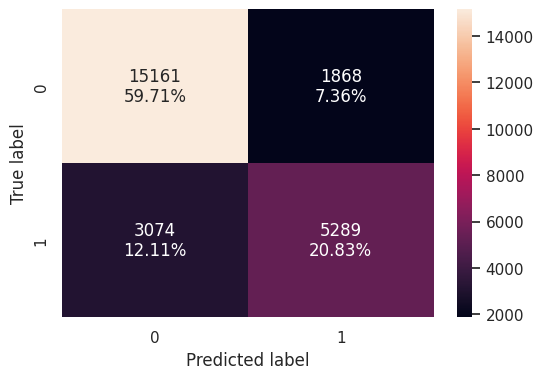

In [75]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train1, y_train)

In [76]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(lg1, X_train1, y_train) ## Complete the code to check performance on X_train1 and y_train
log_reg_model_train_perf

Training performance:


Accuracy  Recall  Precision      F1
0   0.80537 0.63243    0.73900 0.68157

**Test set performance**

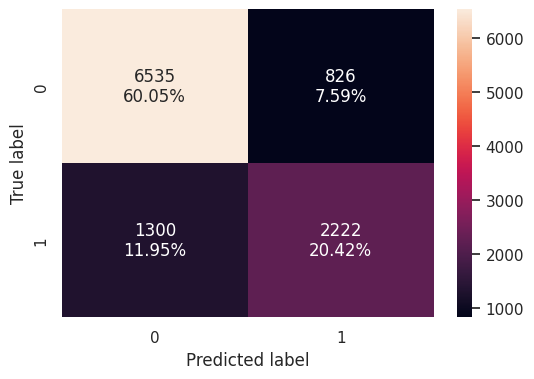

In [77]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test)

In [78]:
print("Testing performance:")
log_reg_model_test_perf = model_performance_classification_statsmodels(lg1, X_test1, y_test) ## Complete the code to check performance on X_train1 and y_train
log_reg_model_test_perf

Testing performance:


Accuracy  Recall  Precision      F1
0   0.80465 0.63089    0.72900 0.67641

- The model is giving a good f1_score of ~0.681 and ~0.676 on the train and test sets respectively
- As the train and test performances are comparable, the model is not overfitting
- Moving forward we will try to improve the performance of the model

## Model Performance Improvement

* Let's see if the f1_score can be improved further by changing the model threshold
* First, we will check the ROC curve, compute the area under the ROC curve (ROC-AUC), and then use it to find the optimal threshold
* Next, we will check the Precision-Recall curve to find the right balance between precision and recall as our metric of choice is f1_score

### ROC Curve and ROC-AUC

* ROC-AUC on training set

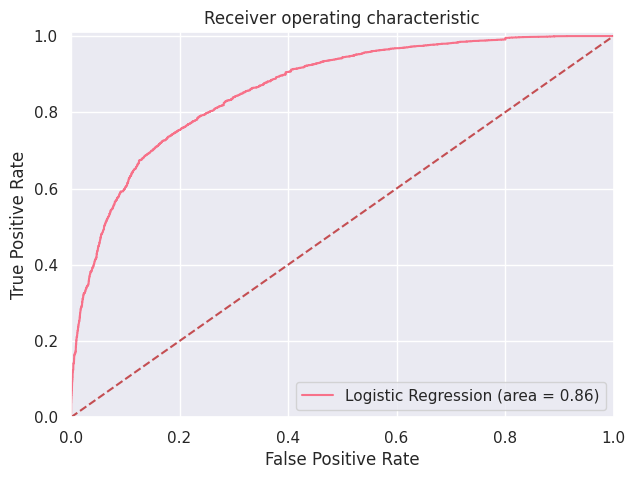

In [79]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Optimal threshold using AUC-ROC curve

In [80]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.369603791589294


**Training set performance**

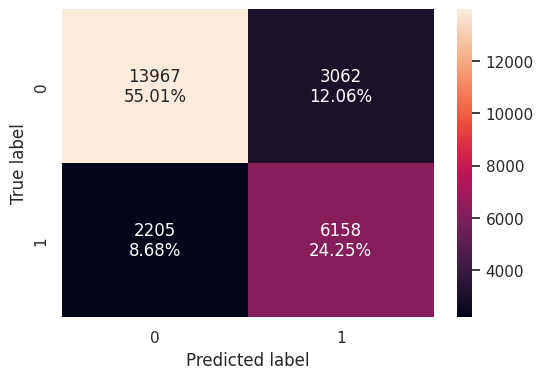

In [81]:
# creating the confusion matrix for X_train1 and y_train with optimal_threshold_auc_roc as threshold
confusion_matrix_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)

In [82]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy  Recall  Precision      F1
0   0.79257 0.73634    0.66790 0.70045

**Test set performance**

***ROC curve on test set***

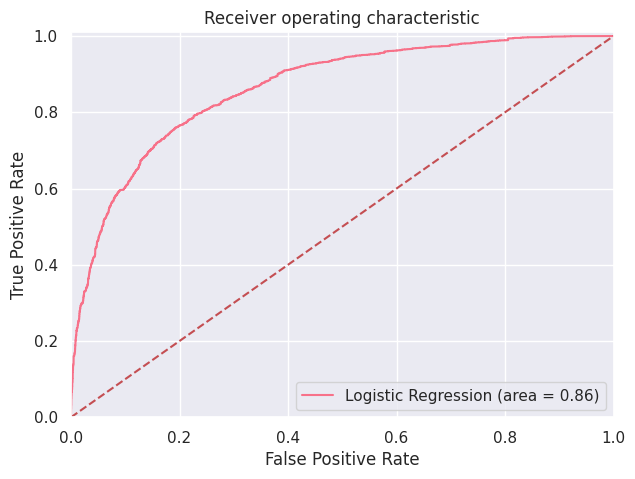

In [83]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

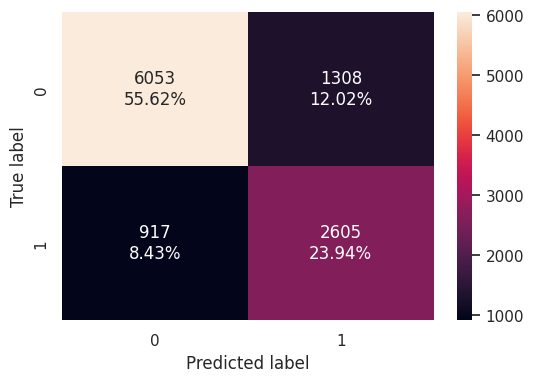

In [84]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=0.37)

In [85]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy  Recall  Precision      F1
0   0.79555 0.73964    0.66573 0.70074

### Precision-Recall Curve
#### Let's use Precision-Recall curve and see if we can find a better threshold

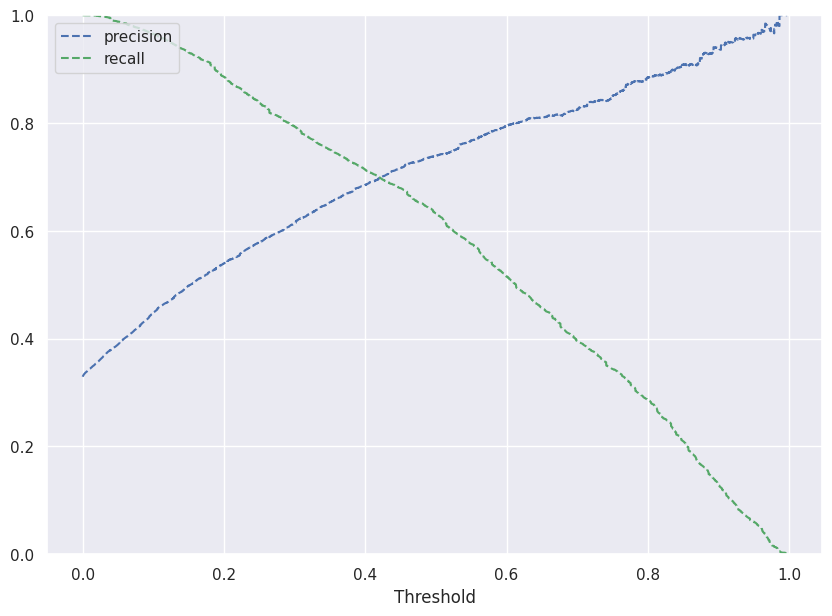

In [86]:
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.42, we get balanced recall and precision.

In [87]:
# setting the threshold
optimal_threshold_curve = 0.42

**Training set performance**

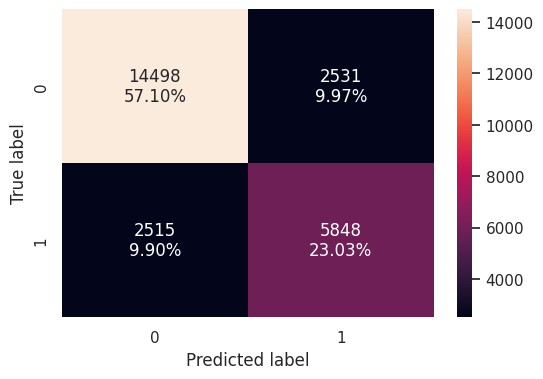

In [88]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1,  X_train1, y_train, threshold=optimal_threshold_curve
)

In [89]:
#Metrics
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy  Recall  Precision      F1
0   0.80128 0.69927    0.69794 0.69860

* It seems that the F1 score has slightly decreased when compared to the optimal threshold obtained from the AUC-ROC curve.

**Test set performance**

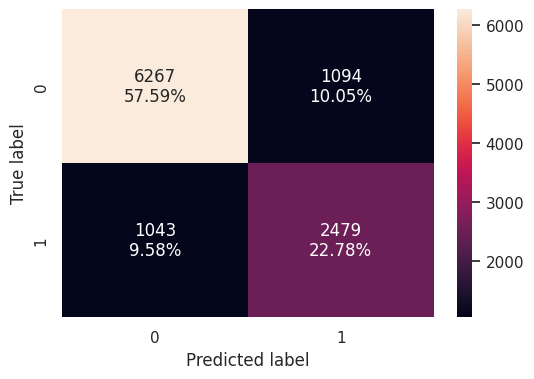

In [90]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=0.42)

In [92]:
#Metrics
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy  Recall  Precision      F1
0   0.80364 0.70386    0.69381 0.69880

## Model Performance Comparison and Final Model Selection

In [93]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold  \
Accuracy                                 0.80537   
Recall                                   0.63243   
Precision                                0.73900   
F1                                       0.68157   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79257   
Recall                                0.73634   
Precision                             0.66790   
F1                                    0.70045   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80128  
Recall                                0.69927  
Precision                             0.69794  
F1                                    0.69860

In [94]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                       0.80465   
Recall                                         0.63089   
Precision                                      0.72900   
F1                                             0.67641   

           Logistic Regression-0.37 Threshold  \
Accuracy                              0.79555   
Recall                                0.73964   
Precision                             0.66573   
F1                                    0.70074   

           Logistic Regression-0.42 Threshold  
Accuracy                              0.80364  
Recall                                0.70386  
Precision                             0.69381  
F1                                    0.69880

## Final Model Summary

* Almost all the three models are performing well on both training and test data indicating that they do not suffer from overfitting.

* Comparing the results, it is seen that the  model with a threshold of 0.37 has the best performance across various metrics, including accuracy, recall, precision, and F1 score. Therefore, it is recommended as the optimal model for predicting booking cancellations in this scenario.

* The threshold value of 0.37 means that if the predicted probability of a booking being canceled exceeds 37%, we will classify it as a cancellation. If the predicted probability falls below 37%, we will classify it as a non-cancellation.

This threshold selection maintain a balance between accurately identifying cancellations (high recall) and minimizing false positives (high precision)

## Building a Decision Tree model

#### Data Preparation for modeling (Decision Tree)

In [95]:
#Creating independent and dependent variables
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

#Create dummy variables
X = pd.get_dummies(X, drop_first=True,dtype=int)

#Splitting for training and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [96]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
booking_status
0   0.67064
1   0.32936
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0   0.67638
1   0.32362
Name: proportion, dtype: float64


## Model Building

In [97]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Model Evaluation

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking.

### Which case is more important?
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity.



### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearnfunction will be used to plot the confusion matrix.

In [98]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [99]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Checking model performance on training set

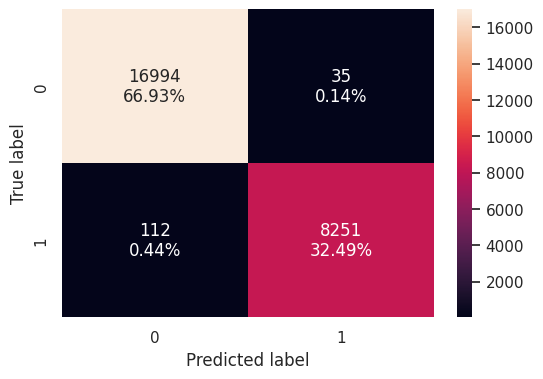

In [100]:
confusion_matrix_sklearn(model, X_train, y_train) #Checking the confusion matrix with sklearn

In [101]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision      F1
0   0.99421 0.98661    0.99578 0.99117

#### Checking model performance on test set

Test performance model:


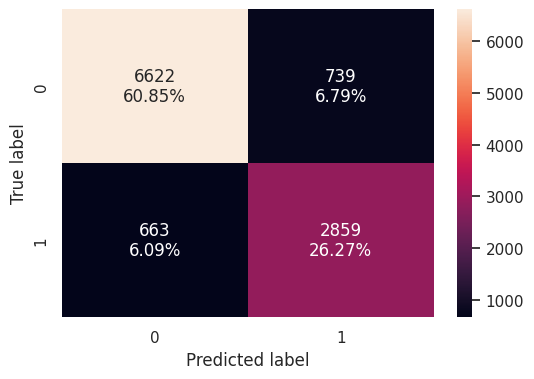

In [102]:
print("Test performance model:")
confusion_matrix_sklearn(model, X_test, y_test) #performance measures in test data

In [103]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

Accuracy  Recall  Precision      F1
0   0.87118 0.81175    0.79461 0.80309

* There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

**Before pruning the tree let's check the important features.**

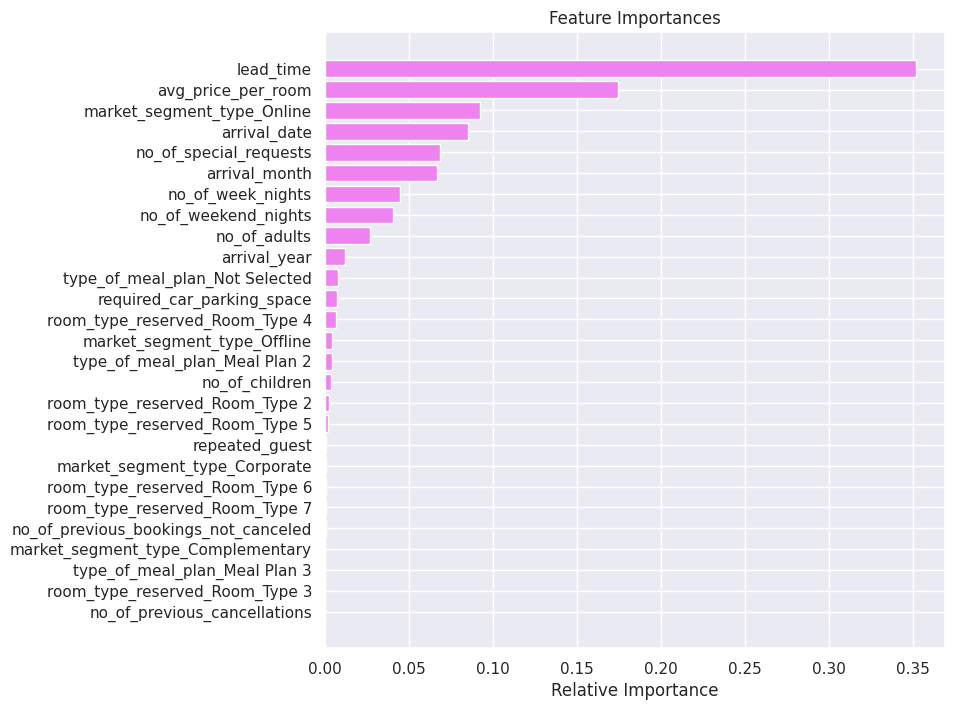

In [104]:
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The feauture importances that are in the top 3 are:
* lead_time
* avg_price_per_room
* market_segment_type_online

## Do we need to prune the tree?

**Let's use pruning techniques to try and reduce overfitting.**

### Decision Tree (Pre-pruning)

**Using GridSearch for Hyperparameter tuning of our tree model**

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [105]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

#### Checking performance on training set

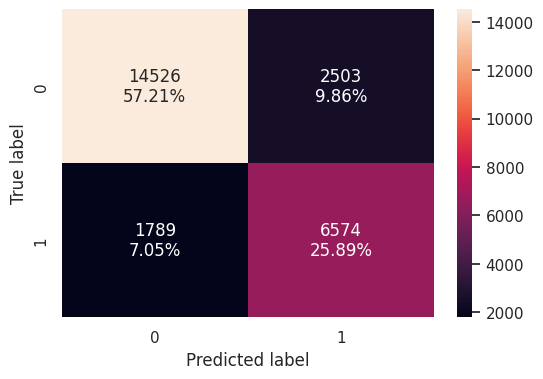

In [106]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [107]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train)
decision_tree_tune_perf_train

Accuracy  Recall  Precision      F1
0   0.83097 0.78608    0.72425 0.75390

#### Checking performance on test set

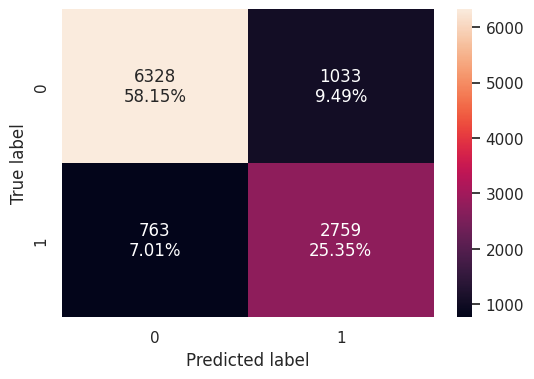

In [108]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [109]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_tune_perf_test

Accuracy  Recall  Precision      F1
0   0.83497 0.78336    0.72758 0.75444

* The model is giving a generalized result now since the recall scores on both the train and test data are coming to be around 0.75 which shows that the model is able to generalize well on unseen data.

#### Visualizing the Decision Tree

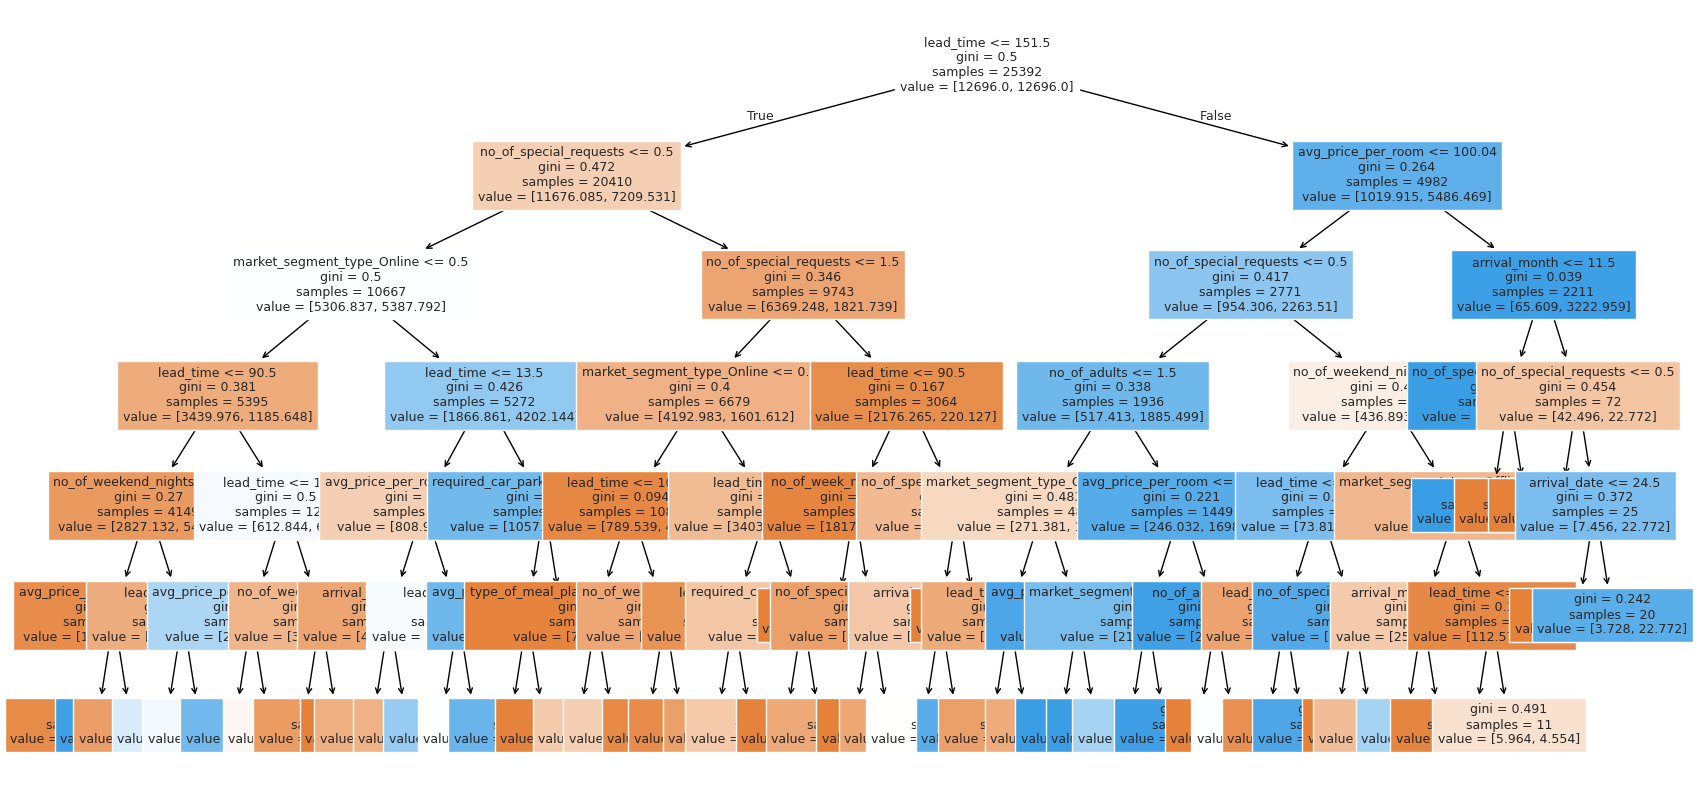

In [110]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [111]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

* The tree has a depth of several levels, indicating that it considers multiple conditions before making a prediction.

* The tree starts by evaluating the lead time feature. If the lead time is less than or equal to 151.50, it further splits the data based on the number of special requests.

* For instances with no special requests, the tree considers additional features such as market segment type, lead time, average price per room, and number of weekend nights to make predictions.

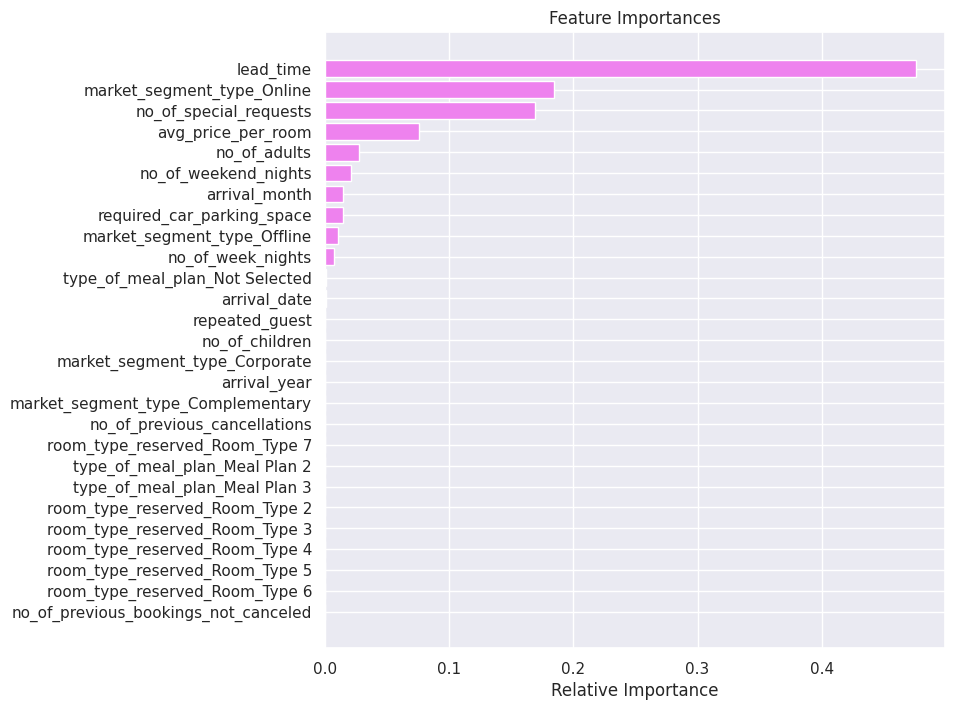

In [112]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Decision Tree (Post pruning) OR **Cost Complexity Pruning**

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

**Total impurity of leaves vs effective alphas of pruned tree**

Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [113]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [114]:
pd.DataFrame(path)

ccp_alphas  impurities
0        0.00000     0.00838
1        0.00000     0.00838
2        0.00000     0.00838
3        0.00000     0.00838
4        0.00000     0.00838
...          ...         ...
1853     0.00890     0.32806
1854     0.00980     0.33786
1855     0.01272     0.35058
1856     0.03412     0.41882
1857     0.08118     0.50000

[1858 rows x 2 columns]

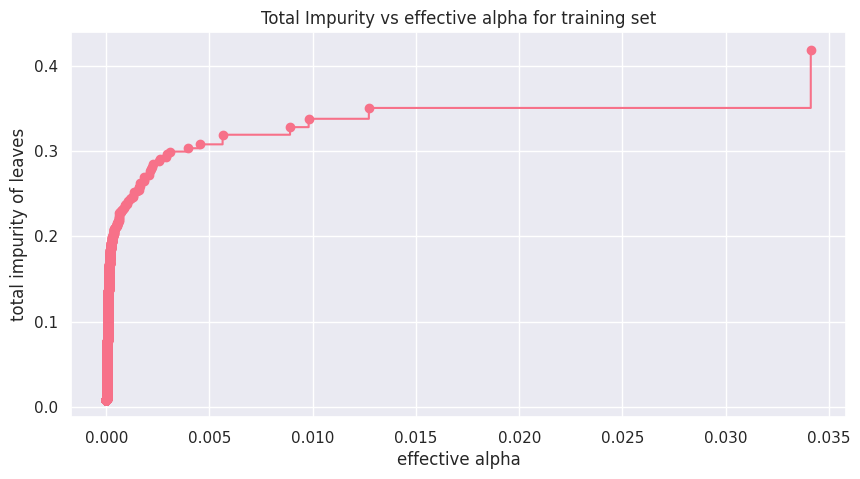

In [115]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [116]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136915


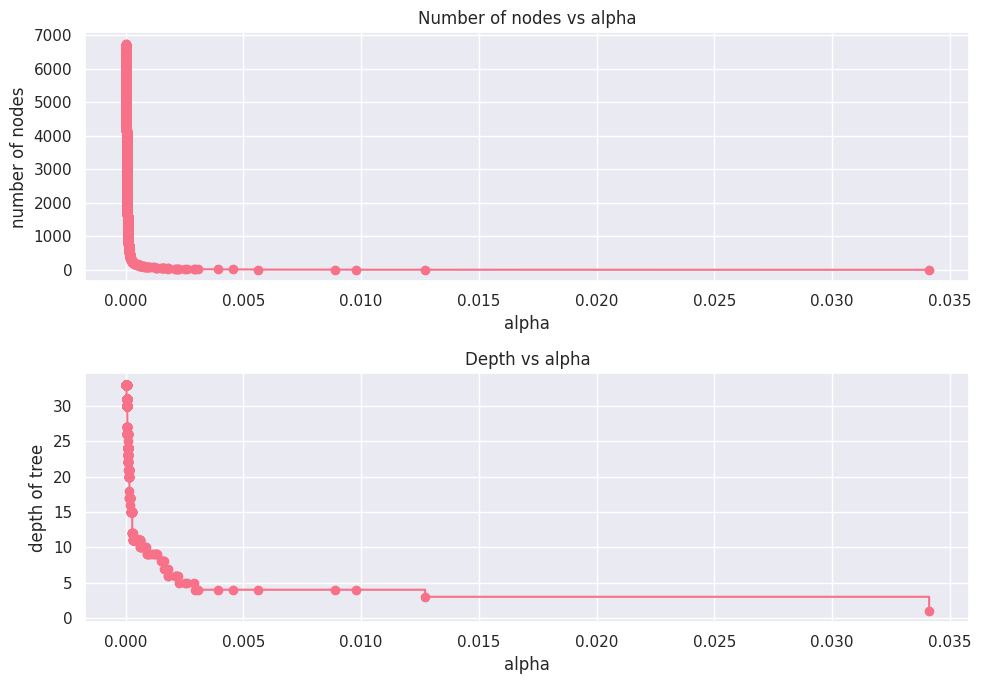

In [117]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### F1 Score vs alpha for training and testing sets

In [118]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

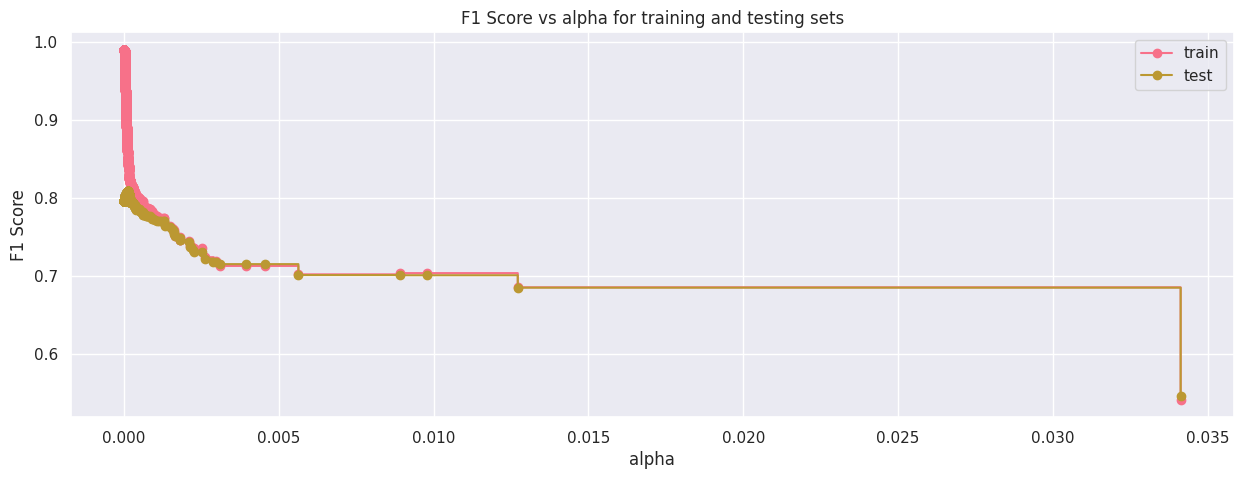

In [119]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [120]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167048,
                       class_weight='balanced', random_state=1)


#### Checking performance on training set

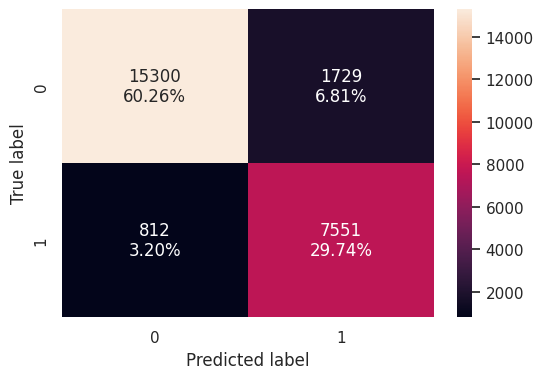

In [121]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [122]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

Accuracy  Recall  Precision      F1
0   0.89993 0.90291    0.81369 0.85598

#### Checking performance on test set

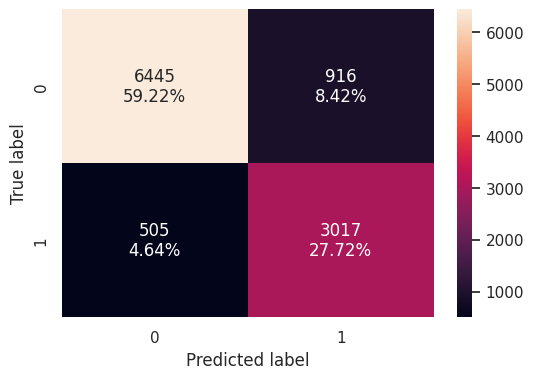

In [123]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [124]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

Accuracy  Recall  Precision      F1
0   0.86943 0.85662    0.76710 0.80939

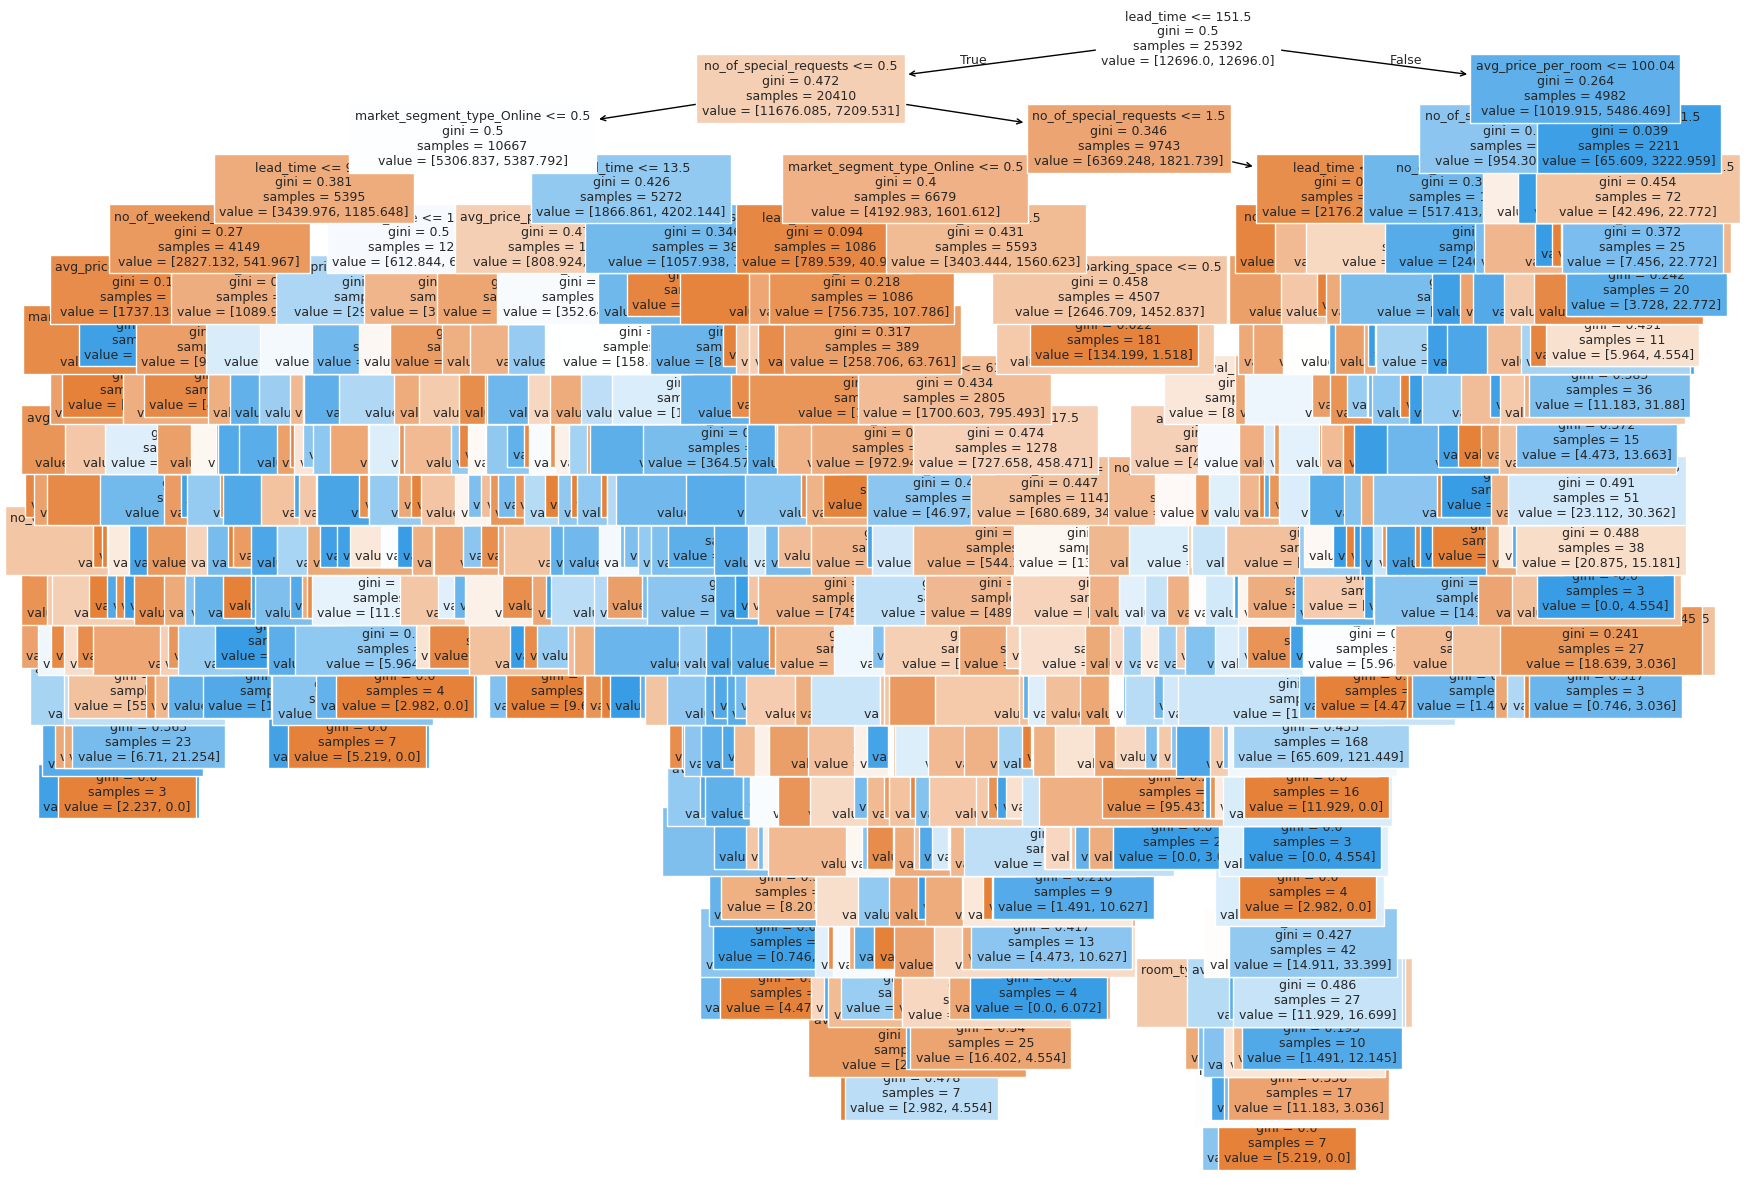

In [125]:
plt.figure(figsize=(20, 15)) #show the decision tree

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [126]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

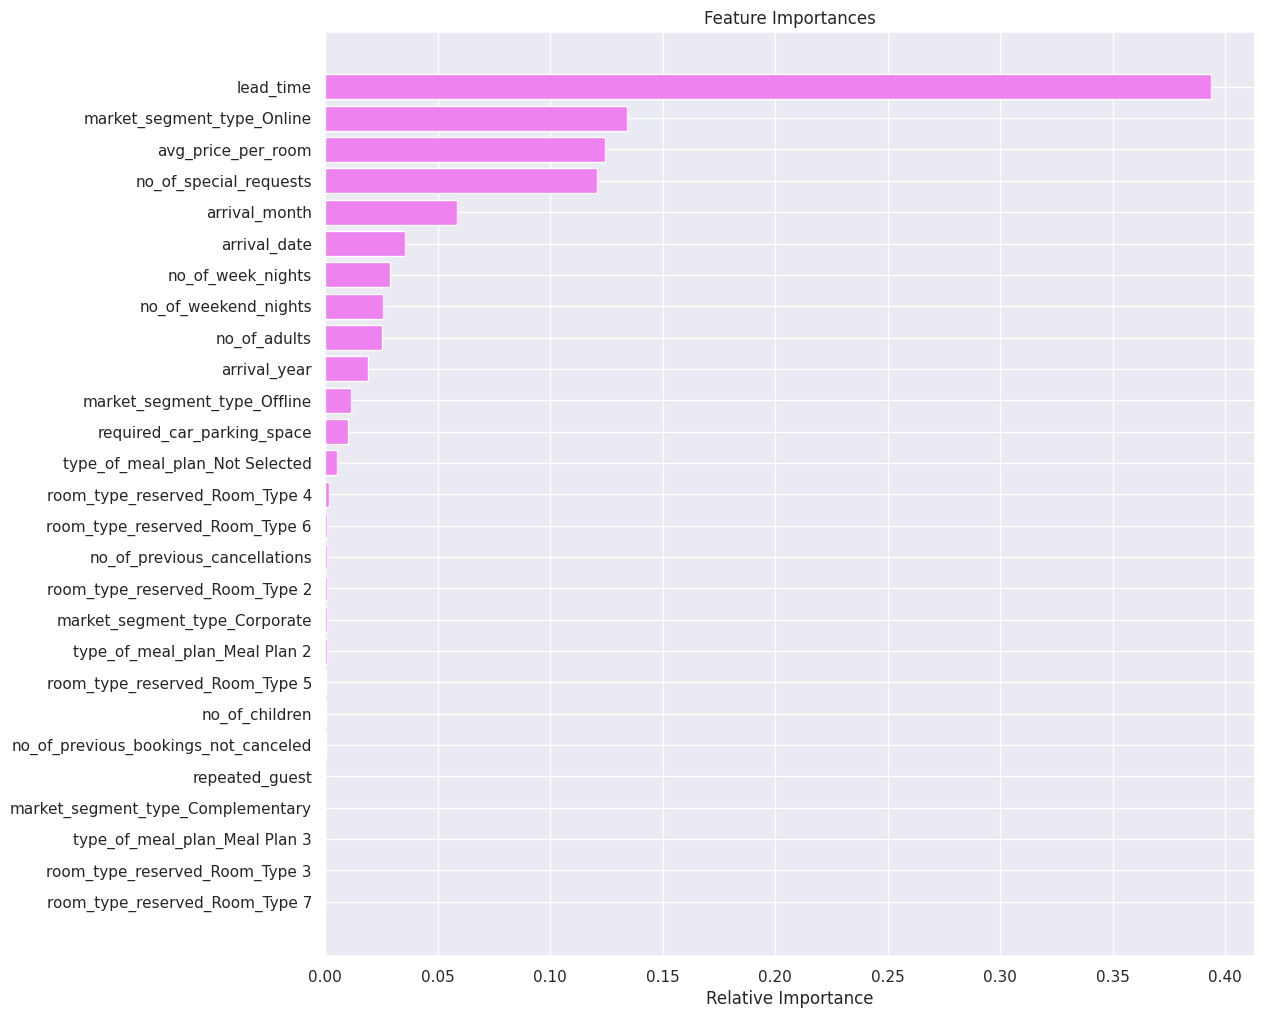

In [127]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Performance Comparison and Conclusions

## Comparison of Models and Final Model Selection

In [128]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.99421                      0.83097   
Recall                   0.98661                      0.78608   
Precision                0.99578                      0.72425   
F1                       0.99117                      0.75390   

           Decision Tree (Post-Pruning)  
Accuracy                        0.89993  
Recall                          0.90291  
Precision                       0.81369  
F1                              0.85598

In [129]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
       decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree with class_weight  Decision Tree (Pre-Pruning)  \
Accuracy                           0.87118                      0.83497   
Recall                             0.81175                      0.78336   
Precision                          0.79461                      0.72758   
F1                                 0.80309                      0.75444   

           Decision Tree (Post-Pruning)  
Accuracy                        0.86943  
Recall                          0.85662  
Precision                       0.76710  
F1                              0.80939

* It was found that the default decision tree was overfitting
* The pre-puning brings the model better and reduce the overfitting
* Considering the best metrics in this case to be F1-Score, the post-pruning model found to have the best F1-score and hence makes the best choice

## Actionable Insights and Recommendations

* The logistic regression model with a threshold=0.37 yielded good results in terms of precision, accuracy and F1 scores. Hence that can be recommended as the optimal choice for accurate cancellation predictions.
* With the Decision Tree, the post pruning model came back as the best choice and can be used to correctly identify actual booking cancellations as well.
* The lead time, average price of bookings and the online market segment came out to be the important features having highest influence on cancellations
- What profitable policies for cancellations and refunds can the hotel adopt?
  * The hotel need to form a refund policy such that any cancellations close to the check-in-date get a lower refund. This would force the customers to make the cancellations in advance and there by helping the hotel to get the rooms re-booked without any revenue loss
  * One other thing is to bring the flexibility for modifying the bookings to add special reqeusts upto a certain day before check-in; this sould help the potential cancellations due toi the need of special reqeusts later on
- What other recommedations would you suggest to the hotel?
  * Introduuce a nonrefundable deposit on all bookings rooms in advance of over 5 months so as to reduce the cancellations and revenue losses
  * Keep the prices low in months of high demand to attract more people and to reduce the likelihood of cancellation
  * It was found that repeated guests are less likely to cancel a booking, implement a loyalty program that offers benefits and rewards to these customers can encourage guests to choose your hotel for future stays and reduce the likelihood of cancellations.
  * During the online booking process, offering addtional customizations or special request would help reduce the likelihood of a cancelled booking.